<h2>Calibration by Simulated Annealing</h2>

In [1]:
%pylab notebook
from __future__ import print_function 
import charistools.find_best_model as fbm
import charistools.meltModels as mM
from charistools.modelEnv import ModelEnv
import glob
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import pandas as pd
import pdb
import re
import sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Chooose starting DDFs
ddfs_start = list(mM.RandomNewDDFs(initialize=True))
print("Begin DDFs here:")
print(ddfs_start)

Begin DDFs here:
[0.18, 5.24, 9.17, 9.27]


In [16]:
%cd /work/charis/ti_model/calibrations_correct_cost
%ls

/work/charis/ti_model/calibrations_correct_cost
AM_Vakhsh_at_Komsomolabad.2str_DDFnbr=10mm_N100_M050.SA_summary.dat
AM_Vakhsh_at_Komsomolabad.2str_DDFnbr=10mm_N100_M050.SA_summary.png@
AM_Vakhsh_at_Komsomolabad.2str_DDFnbr=10mm_N100_M050.stats.png@
AM_Vakhsh_at_Komsomolabad.2str_DDFnbr=10mm_N100_M050.stats.txt
AM_Vakhsh_at_Komsomolabad.2str_DDFnbr=10mm_N100_M050.z82.791_Best2.38_4.86_55.86_56.94.stats.png
AM_Vakhsh_at_Komsomolabad.2str_DDFnbr=10mm_N100_M050.z97.470_Best1.05_5.88_13.89_14.93.SA_summary.png
AM_Vakhsh_at_Komsomolabad.3str_DDFnbr=10mm_N100_M050.SA_summary.dat
AM_Vakhsh_at_Komsomolabad.3str_DDFnbr=10mm_N100_M050.SA_summary.png@
AM_Vakhsh_at_Komsomolabad.3str_DDFnbr=10mm_N100_M050.stats.png@
AM_Vakhsh_at_Komsomolabad.3str_DDFnbr=10mm_N100_M050.stats.txt
AM_Vakhsh_at_Komsomolabad.3str_DDFnbr=10mm_N100_M050.z120.778_Best1.71_2.07_47.17_48.42.SA_summary.png
AM_Vakhsh_at_Komsomolabad.3str_DDFnbr=10mm_N100_M050.z81.743_Best2.59_4.5_56.9_57.7.stats.png
AM_Vakhsh_at_Komsomolabad.3s

In [3]:
# Simulated annealing parameters
# Number of cycles
numCycles = 100
# Number of trials per cycle
numTrials = 50
# Number of accepted solutions
na = 0.0
# Probability of accepting worse solution at the start
p1 = 0.7
# Probability of accepting worse solution at the end
p50 = 0.001
# Initial temperature
t1 = -1.0 / math.log(p1)
# Final temperature
t50 = -1.0 / math.log(p50)
# Fraction reduction every cycle
frac = (t50/t1)**(1.0/(numCycles-1.0))
# Initialize DDFs
x = np.zeros((numCycles + 1, 4))
x[0] = ddfs_start
xi = np.zeros(4)
xi = ddfs_start
na = na + 1.0

In [4]:
# Melt model parameters for a given basin
#drainageid = "IN_Hunza_at_DainyorBridge"
#years = [2001, 2002, 2003]
#drainageid = "AM_Vakhsh_at_Komsomolabad"
#years = [2004, 2005, 2007]
#drainageid = "SY_Naryn_at_NarynTown"
#years = [2003, 2005, 2007]
#drainageid = "GA_Karnali_at_Benighat"
#years = [2001, 2003, 2004]
drainageid = "GA_Narayani_at_Devghat"
years = [2001, 2004, 2005]
#drainageid = "GA_SaptaKosi_at_Chatara"
#years = [2003, 2004, 2005]

nstrikes = 3
ablation_method='grsize_scag'
use_daily_threshold_file=True
rainfall_col='diff_km3'
runoff_col='runoff'
config_file='/projects/brodzik/charis_ti_melt/calibration_modelEnv_config.ini'
myEnv = ModelEnv(tileConfigFile=config_file)

# How far away to look from the previous set of DDFs
neighborhood_mm = 10

# label will be used for plot titles and output filenames
label = "%1dstr DDFnbr=%dmm N%03d M%03d" % ( nstrikes, neighborhood_mm, numCycles, numTrials )
print(label)

3str DDFnbr=10mm N100 M050


In [5]:
# Calculate the first calibration cost,
# this is "Current best results so far"
xc = np.zeros(4)
xc[:] = x[0]                                                        
result = mM.CalibrationStats(myEnv, drainageid, years, nstrikes,                                                                
                             xi[0], xi[1], xi[2], xi[3], 
                             rainfall_col=rainfall_col, 
                             runoff_col=runoff_col,
                             ablation_method=ablation_method, 
                             use_daily_threshold_file=use_daily_threshold_file)
df, stats_df = mM.CalibrationCost(result)
fc = stats_df.z.iloc[0]
fs = np.zeros(numCycles+1)
fs[0] = fc
# Current temperature
t = t1
# DeltaE Average
DeltaE_avg = 0.0
print("Cost of initial DDFs: %.3f" % fs[0])

Cost of initial DDFs: 113.692


In [6]:
logFile = "%s.%s.stats.txt" % ( drainageid, label.replace(" ", "_") )
logf = open(logFile, "w")
print(logFile)

GA_Narayani_at_Devghat.3str_DDFnbr=10mm_N100_M050.stats.txt


In [7]:
mM.SaveCalibrationStats(myEnv, drainageid, nstrikes,result,ablation_method=ablation_method, 
                        use_daily_threshold_file=use_daily_threshold_file, file=sys.stderr,header=True) 
mM.SaveCalibrationStats(myEnv, drainageid, nstrikes,result,ablation_method=ablation_method, 
                        use_daily_threshold_file=use_daily_threshold_file, file=logf,header=True) 

DRAINAGEID YYYY ICE NSTRIKES SNOW ABLATION ABLATION_METHOD THRESHOLD TEMPERATURE RAINFALL RUNOFF model min_snow_ddf max_snow_ddf min_ice_ddf max_ice_ddf rainfall_km3 SOI_melt_km3 SOL_melt_km3 EGI_melt_km3 runoff_km3 monthly_rmse_km3 annual_voldiff_pcent
GA_Narayani_at_Devghat 2001 MODICE.v0.4.min05yr 3 MODSCAG_GF_Snow.v0.9 MODSCAG_GF_GrainSize.v0.9 grsize_scag fromFile ERA_Interim_downscale_uncorrected_tsurf.v0.3 APHRODITE_rainfall_v01 Various 0.18_5.24_9.17_9.27       0.1800       5.2400       9.1700       9.2700      25.3128       0.4757       1.9411       0.0510      51.4200       3.0203      45.9732
GA_Narayani_at_Devghat 2004 MODICE.v0.4.min05yr 3 MODSCAG_GF_Snow.v0.9 MODSCAG_GF_GrainSize.v0.9 grsize_scag fromFile ERA_Interim_downscale_uncorrected_tsurf.v0.3 APHRODITE_rainfall_v01 Various 0.18_5.24_9.17_9.27       0.1800       5.2400       9.1700       9.2700      22.4309       0.3182       2.8054       0.0545      45.5500       2.3075      43.7783
GA_Narayani_at_Devghat 2005 MODI

In [8]:
for i in range(numCycles):
    print("Cycle: %d with Temperature: %f" % (i, t))
    
    for j in range(numTrials):
        # Generate new trial DDFs, relative to xc "current best results so far"
        ddfs = list(mM.RandomNewDDFs(min_snow_ddf=xc[0], max_snow_ddf=xc[1], 
                                     min_ice_ddf=xc[2], max_ice_ddf=xc[3],
                                     neighborhood_mm=neighborhood_mm))
        xi[0] = ddfs[0]
        xi[1] = ddfs[1]
        xi[2] = ddfs[2]
        xi[3] = ddfs[3]
        
        # Calculate the cost at the new DDFs
        result = mM.CalibrationStats(
            myEnv, drainageid, years, nstrikes,                                                                
            xi[0], xi[1], xi[2], xi[3], 
            rainfall_col=rainfall_col, 
            runoff_col=runoff_col,
            ablation_method=ablation_method, 
            use_daily_threshold_file=use_daily_threshold_file)
        df, stats_df = mM.CalibrationCost(result)
        
        # Save the calibration stats 
        mM.SaveCalibrationStats(myEnv, drainageid, nstrikes,result,ablation_method=ablation_method, 
                                use_daily_threshold_file=use_daily_threshold_file, file=logf)
        
        trial_cost = stats_df.z.iloc[0]
        print("cycle=%d, trial=%d, ddfs=%.2f, %.2f, %.2f, %.2f, best_cost_so_far=%.3f, trial_cost=%.3f" % (
            i, j, xi[0], xi[1], xi[2], xi[3], fc, trial_cost), file=sys.stderr)
        
        DeltaE = abs(trial_cost - fc)
        if (trial_cost > fc):
            
            # Initialize DeltaE_avg if a worse solution was found
            # on the first iteration
            if (i==0 and j==0): DeltaE_avg = DeltaE
                
            # objective function is worse
            # generate prob of acceptance
            p = math.exp(-DeltaE/(DeltaE_avg * t))
            
            # determine whether to accept worse point
            if (random.random() < p):
                # accept the worse solution
                accept = True
            else:
                # don't accept the worse solution
                accept = False
        else:
            
            # objective function is lower, automatically accept
            accept = True
        
        if (accept == True):
            
            # update the currently accepted solution
            xc[0] = xi[0]
            xc[1] = xi[1]
            xc[2] = xi[2]
            xc[3] = xi[3]
            fc = trial_cost
            
            # increment number of accepted solutions
            na = na + 1.0
            # update DeltaE_avg
            DeltaE_avg = (DeltaE_avg * (na - 1.0) + DeltaE) / na
            
            print("==> Updating best_cost_so_far", file=sys.stderr)
            
    # Record the best x values at the end of every cycle
    x[i+1][0] = xc[0]
    x[i+1][1] = xc[1]
    x[i+1][2] = xc[2]
    x[i+1][3] = xc[3]
    fs[i+1] = fc
    
    # Lower the temperature for the next cycle
    t = frac * t

# Close the logfile
logf.close()

# print solution
print("Best solution: %s" % xc, file=sys.stderr)
print("Best cost    : %f" % fc, file=sys.stderr)

# Coerce answers to DataFrame
caldf = pd.DataFrame(x, columns=['winter_snow_ddf', 'summer_snow_ddf', 'winter_ice_ddf', 'summer_ice_ddf'])
caldf["min_cycle_z"] = fs
caldf

Cycle: 0 with Temperature: 2.803673


cycle=0, trial=0, ddfs=1.12, 7.45, 3.50, 15.04, best_cost_so_far=113.692, trial_cost=108.385
==> Updating best_cost_so_far
cycle=0, trial=1, ddfs=10.37, 15.89, 10.49, 20.95, best_cost_so_far=108.385, trial_cost=86.186
==> Updating best_cost_so_far
cycle=0, trial=2, ddfs=12.51, 16.03, 13.35, 22.39, best_cost_so_far=86.186, trial_cost=84.412
==> Updating best_cost_so_far
cycle=0, trial=3, ddfs=6.89, 8.14, 21.14, 26.00, best_cost_so_far=84.412, trial_cost=102.338
cycle=0, trial=4, ddfs=19.28, 20.57, 19.69, 29.66, best_cost_so_far=84.412, trial_cost=73.578
==> Updating best_cost_so_far
cycle=0, trial=5, ddfs=15.81, 21.88, 22.86, 35.13, best_cost_so_far=73.578, trial_cost=74.259
==> Updating best_cost_so_far
cycle=0, trial=6, ddfs=11.52, 23.84, 16.26, 32.70, best_cost_so_far=74.259, trial_cost=74.994
==> Updating best_cost_so_far
cycle=0, trial=7, ddfs=12.24, 19.74, 17.24, 32.56, best_cost_so_far=74.994, trial_cost=79.247
==> Updating best_cost_so_far
cycle=0, trial=8, ddfs=21.12, 21.39, 23

Cycle: 1 with Temperature: 2.720989


cycle=1, trial=0, ddfs=28.39, 35.25, 28.80, 57.73, best_cost_so_far=61.123, trial_cost=59.078
==> Updating best_cost_so_far
cycle=1, trial=1, ddfs=30.39, 38.79, 34.13, 58.68, best_cost_so_far=59.078, trial_cost=67.324
cycle=1, trial=2, ddfs=32.21, 41.76, 34.00, 53.59, best_cost_so_far=59.078, trial_cost=75.098
cycle=1, trial=3, ddfs=18.56, 34.81, 37.98, 53.75, best_cost_so_far=59.078, trial_cost=63.632
==> Updating best_cost_so_far
cycle=1, trial=4, ddfs=23.89, 42.31, 46.38, 48.58, best_cost_so_far=63.632, trial_cost=73.464
cycle=1, trial=5, ddfs=21.52, 35.68, 42.37, 45.42, best_cost_so_far=63.632, trial_cost=62.018
==> Updating best_cost_so_far
cycle=1, trial=6, ddfs=30.98, 33.55, 41.47, 53.10, best_cost_so_far=62.018, trial_cost=58.296
==> Updating best_cost_so_far
cycle=1, trial=7, ddfs=25.76, 42.16, 37.65, 45.60, best_cost_so_far=58.296, trial_cost=73.690
cycle=1, trial=8, ddfs=40.29, 40.53, 50.72, 54.55, best_cost_so_far=58.296, trial_cost=75.214
cycle=1, trial=9, ddfs=38.96, 41.8

Cycle: 2 with Temperature: 2.640743


cycle=2, trial=0, ddfs=46.04, 56.24, 49.55, 54.34, best_cost_so_far=101.279, trial_cost=119.274
cycle=2, trial=1, ddfs=46.49, 49.70, 59.36, 59.87, best_cost_so_far=101.279, trial_cost=101.821
==> Updating best_cost_so_far
cycle=2, trial=2, ddfs=56.08, 56.71, 57.89, 58.15, best_cost_so_far=101.821, trial_cost=125.713
cycle=2, trial=3, ddfs=41.54, 58.54, 49.48, 51.04, best_cost_so_far=101.821, trial_cost=123.378
cycle=2, trial=4, ddfs=47.22, 59.05, 50.39, 59.71, best_cost_so_far=101.821, trial_cost=127.699
cycle=2, trial=5, ddfs=52.50, 59.50, 56.12, 57.21, best_cost_so_far=101.821, trial_cost=131.625
cycle=2, trial=6, ddfs=56.48, 58.10, 57.02, 58.46, best_cost_so_far=101.821, trial_cost=129.796
cycle=2, trial=7, ddfs=44.43, 45.62, 52.40, 53.16, best_cost_so_far=101.821, trial_cost=89.960
==> Updating best_cost_so_far
cycle=2, trial=8, ddfs=44.24, 55.60, 52.64, 58.99, best_cost_so_far=89.960, trial_cost=116.716
cycle=2, trial=9, ddfs=38.39, 50.32, 45.46, 57.00, best_cost_so_far=89.960, tr

Cycle: 3 with Temperature: 2.562863


cycle=3, trial=0, ddfs=10.55, 43.07, 47.25, 52.68, best_cost_so_far=71.922, trial_cost=71.087
==> Updating best_cost_so_far
cycle=3, trial=1, ddfs=10.01, 42.10, 54.72, 59.76, best_cost_so_far=71.087, trial_cost=68.772
==> Updating best_cost_so_far
cycle=3, trial=2, ddfs=19.48, 46.69, 48.68, 58.23, best_cost_so_far=68.772, trial_cost=82.770
cycle=3, trial=3, ddfs=16.12, 38.14, 52.49, 57.44, best_cost_so_far=68.772, trial_cost=63.801
==> Updating best_cost_so_far
cycle=3, trial=4, ddfs=23.00, 38.29, 51.31, 52.37, best_cost_so_far=63.801, trial_cost=63.766
==> Updating best_cost_so_far
cycle=3, trial=5, ddfs=19.66, 45.49, 44.11, 59.15, best_cost_so_far=63.766, trial_cost=79.862
cycle=3, trial=6, ddfs=18.40, 35.49, 52.72, 57.46, best_cost_so_far=63.766, trial_cost=63.404
==> Updating best_cost_so_far
cycle=3, trial=7, ddfs=16.14, 36.00, 59.94, 59.97, best_cost_so_far=63.404, trial_cost=64.276
==> Updating best_cost_so_far
cycle=3, trial=8, ddfs=13.87, 26.78, 56.24, 58.69, best_cost_so_far=

Cycle: 4 with Temperature: 2.487281


cycle=4, trial=0, ddfs=26.55, 26.82, 59.38, 59.65, best_cost_so_far=59.673, trial_cost=63.172
==> Updating best_cost_so_far
cycle=4, trial=1, ddfs=28.42, 32.50, 49.62, 58.64, best_cost_so_far=63.172, trial_cost=59.656
==> Updating best_cost_so_far
cycle=4, trial=2, ddfs=36.44, 36.69, 40.34, 54.39, best_cost_so_far=59.656, trial_cost=64.423
==> Updating best_cost_so_far
cycle=4, trial=3, ddfs=45.42, 46.46, 46.64, 55.81, best_cost_so_far=64.423, trial_cost=92.615
cycle=4, trial=4, ddfs=45.32, 45.83, 47.45, 59.41, best_cost_so_far=64.423, trial_cost=90.961
==> Updating best_cost_so_far
cycle=4, trial=5, ddfs=49.62, 54.05, 51.73, 53.31, best_cost_so_far=90.961, trial_cost=115.013
cycle=4, trial=6, ddfs=51.06, 51.44, 52.14, 59.35, best_cost_so_far=90.961, trial_cost=108.671
cycle=4, trial=7, ddfs=51.99, 53.21, 56.97, 59.49, best_cost_so_far=90.961, trial_cost=113.985
==> Updating best_cost_so_far
cycle=4, trial=8, ddfs=58.97, 59.70, 59.75, 59.80, best_cost_so_far=113.985, trial_cost=135.620

Cycle: 5 with Temperature: 2.413927


cycle=5, trial=0, ddfs=37.63, 41.15, 41.46, 54.63, best_cost_so_far=63.423, trial_cost=75.682
cycle=5, trial=1, ddfs=34.52, 42.70, 41.60, 58.54, best_cost_so_far=63.423, trial_cost=78.383
==> Updating best_cost_so_far
cycle=5, trial=2, ddfs=36.87, 51.14, 50.41, 51.56, best_cost_so_far=78.383, trial_cost=101.153
cycle=5, trial=3, ddfs=24.74, 43.16, 49.28, 56.03, best_cost_so_far=78.383, trial_cost=75.905
==> Updating best_cost_so_far
cycle=5, trial=4, ddfs=19.95, 40.89, 41.66, 57.87, best_cost_so_far=75.905, trial_cost=68.879
==> Updating best_cost_so_far
cycle=5, trial=5, ddfs=23.15, 43.99, 35.75, 55.52, best_cost_so_far=68.879, trial_cost=77.337
cycle=5, trial=6, ddfs=23.30, 36.27, 38.15, 49.43, best_cost_so_far=68.879, trial_cost=61.081
==> Updating best_cost_so_far
cycle=5, trial=7, ddfs=24.18, 37.14, 36.80, 51.09, best_cost_so_far=61.081, trial_cost=61.463
==> Updating best_cost_so_far
cycle=5, trial=8, ddfs=30.33, 39.74, 46.57, 49.24, best_cost_so_far=61.463, trial_cost=69.504
cyc

Cycle: 6 with Temperature: 2.342737


cycle=6, trial=0, ddfs=9.62, 27.96, 46.75, 52.45, best_cost_so_far=71.433, trial_cost=72.096
==> Updating best_cost_so_far
cycle=6, trial=1, ddfs=16.71, 24.48, 54.28, 55.38, best_cost_so_far=72.096, trial_cost=70.682
==> Updating best_cost_so_far
cycle=6, trial=2, ddfs=9.83, 32.65, 46.39, 49.65, best_cost_so_far=70.682, trial_cost=68.975
==> Updating best_cost_so_far
cycle=6, trial=3, ddfs=15.35, 28.18, 48.82, 58.91, best_cost_so_far=68.975, trial_cost=68.524
==> Updating best_cost_so_far
cycle=6, trial=4, ddfs=24.59, 25.23, 52.26, 55.63, best_cost_so_far=68.524, trial_cost=65.436
==> Updating best_cost_so_far
cycle=6, trial=5, ddfs=33.80, 34.73, 55.09, 59.69, best_cost_so_far=65.436, trial_cost=59.096
==> Updating best_cost_so_far
cycle=6, trial=6, ddfs=36.51, 37.89, 47.29, 50.43, best_cost_so_far=59.096, trial_cost=67.275
==> Updating best_cost_so_far
cycle=6, trial=7, ddfs=26.98, 41.64, 48.95, 59.63, best_cost_so_far=67.275, trial_cost=73.027
==> Updating best_cost_so_far
cycle=6, t

Cycle: 7 with Temperature: 2.273646


cycle=7, trial=0, ddfs=21.03, 45.23, 51.55, 55.54, best_cost_so_far=59.478, trial_cost=79.684
==> Updating best_cost_so_far
cycle=7, trial=1, ddfs=22.03, 52.09, 54.26, 57.44, best_cost_so_far=79.684, trial_cost=97.497
cycle=7, trial=2, ddfs=17.92, 46.00, 49.08, 55.54, best_cost_so_far=79.684, trial_cost=80.490
==> Updating best_cost_so_far
cycle=7, trial=3, ddfs=10.59, 51.51, 49.94, 55.20, best_cost_so_far=80.490, trial_cost=91.656
==> Updating best_cost_so_far
cycle=7, trial=4, ddfs=19.84, 44.27, 56.58, 58.35, best_cost_so_far=91.656, trial_cost=76.962
==> Updating best_cost_so_far
cycle=7, trial=5, ddfs=22.20, 41.38, 51.52, 59.15, best_cost_so_far=76.962, trial_cost=70.790
==> Updating best_cost_so_far
cycle=7, trial=6, ddfs=16.69, 35.86, 42.53, 49.47, best_cost_so_far=70.790, trial_cost=64.203
==> Updating best_cost_so_far
cycle=7, trial=7, ddfs=9.48, 39.23, 33.35, 46.51, best_cost_so_far=64.203, trial_cost=66.795
==> Updating best_cost_so_far
cycle=7, trial=8, ddfs=14.86, 48.32, 42

Cycle: 8 with Temperature: 2.206593


cycle=8, trial=0, ddfs=8.01, 48.14, 26.47, 44.13, best_cost_so_far=68.808, trial_cost=82.250
==> Updating best_cost_so_far
cycle=8, trial=1, ddfs=5.16, 57.01, 19.24, 37.58, best_cost_so_far=82.250, trial_cost=103.452
cycle=8, trial=2, ddfs=6.43, 51.57, 33.10, 34.37, best_cost_so_far=82.250, trial_cost=90.097
==> Updating best_cost_so_far
cycle=8, trial=3, ddfs=13.98, 57.58, 39.56, 43.85, best_cost_so_far=90.097, trial_cost=108.463
==> Updating best_cost_so_far
cycle=8, trial=4, ddfs=23.43, 54.77, 34.65, 43.43, best_cost_so_far=108.463, trial_cost=104.872
==> Updating best_cost_so_far
cycle=8, trial=5, ddfs=21.24, 46.24, 38.48, 47.84, best_cost_so_far=104.872, trial_cost=82.143
==> Updating best_cost_so_far
cycle=8, trial=6, ddfs=27.14, 49.49, 32.01, 39.50, best_cost_so_far=82.143, trial_cost=92.520
==> Updating best_cost_so_far
cycle=8, trial=7, ddfs=32.53, 53.76, 33.50, 47.71, best_cost_so_far=92.520, trial_cost=106.119
==> Updating best_cost_so_far
cycle=8, trial=8, ddfs=35.47, 57.26

Cycle: 9 with Temperature: 2.141517


cycle=9, trial=0, ddfs=15.92, 52.70, 36.88, 50.34, best_cost_so_far=80.066, trial_cost=96.563
==> Updating best_cost_so_far
cycle=9, trial=1, ddfs=21.50, 45.45, 28.53, 52.50, best_cost_so_far=96.563, trial_cost=80.298
==> Updating best_cost_so_far
cycle=9, trial=2, ddfs=27.65, 42.19, 28.01, 46.99, best_cost_so_far=80.298, trial_cost=74.413
==> Updating best_cost_so_far
cycle=9, trial=3, ddfs=21.55, 36.73, 22.73, 48.38, best_cost_so_far=74.413, trial_cost=61.842
==> Updating best_cost_so_far
cycle=9, trial=4, ddfs=26.18, 35.92, 30.49, 56.31, best_cost_so_far=61.842, trial_cost=59.896
==> Updating best_cost_so_far
cycle=9, trial=5, ddfs=35.53, 38.29, 39.28, 56.05, best_cost_so_far=59.896, trial_cost=67.916
==> Updating best_cost_so_far
cycle=9, trial=6, ddfs=37.82, 45.88, 38.95, 49.79, best_cost_so_far=67.916, trial_cost=87.700
==> Updating best_cost_so_far
cycle=9, trial=7, ddfs=37.57, 55.73, 42.48, 44.76, best_cost_so_far=87.700, trial_cost=113.701
cycle=9, trial=8, ddfs=34.06, 52.20, 

Cycle: 10 with Temperature: 2.078361


cycle=10, trial=0, ddfs=37.64, 38.16, 38.22, 45.02, best_cost_so_far=62.062, trial_cost=68.253
cycle=10, trial=1, ddfs=25.87, 37.71, 36.59, 38.82, best_cost_so_far=62.062, trial_cost=63.156
==> Updating best_cost_so_far
cycle=10, trial=2, ddfs=25.61, 28.85, 43.52, 45.82, best_cost_so_far=63.156, trial_cost=62.656
==> Updating best_cost_so_far
cycle=10, trial=3, ddfs=24.81, 37.06, 35.12, 47.21, best_cost_so_far=62.656, trial_cost=61.430
==> Updating best_cost_so_far
cycle=10, trial=4, ddfs=18.00, 27.28, 33.48, 47.57, best_cost_so_far=61.430, trial_cost=67.828
==> Updating best_cost_so_far
cycle=10, trial=5, ddfs=19.09, 22.49, 31.40, 38.37, best_cost_so_far=67.828, trial_cost=71.439
cycle=10, trial=6, ddfs=25.23, 25.73, 38.26, 45.02, best_cost_so_far=67.828, trial_cost=64.865
==> Updating best_cost_so_far
cycle=10, trial=7, ddfs=31.68, 35.48, 42.70, 44.75, best_cost_so_far=64.865, trial_cost=59.952
==> Updating best_cost_so_far
cycle=10, trial=8, ddfs=27.39, 42.66, 48.63, 50.14, best_cos

Cycle: 11 with Temperature: 2.017067


cycle=11, trial=0, ddfs=47.03, 56.97, 50.74, 52.18, best_cost_so_far=102.704, trial_cost=121.749
cycle=11, trial=1, ddfs=55.70, 59.02, 57.16, 59.64, best_cost_so_far=102.704, trial_cost=131.978
cycle=11, trial=2, ddfs=40.41, 42.71, 59.67, 59.68, best_cost_so_far=102.704, trial_cost=80.835
==> Updating best_cost_so_far
cycle=11, trial=3, ddfs=48.01, 50.18, 59.29, 59.76, best_cost_so_far=80.835, trial_cost=103.826
cycle=11, trial=4, ddfs=40.40, 47.55, 51.22, 53.97, best_cost_so_far=80.835, trial_cost=93.248
cycle=11, trial=5, ddfs=45.25, 47.30, 56.86, 58.51, best_cost_so_far=80.835, trial_cost=94.827
cycle=11, trial=6, ddfs=30.98, 33.85, 55.37, 56.74, best_cost_so_far=80.835, trial_cost=58.144
==> Updating best_cost_so_far
cycle=11, trial=7, ddfs=25.43, 41.92, 46.17, 55.27, best_cost_so_far=58.144, trial_cost=73.116
cycle=11, trial=8, ddfs=34.30, 37.83, 51.67, 58.82, best_cost_so_far=58.144, trial_cost=66.444
cycle=11, trial=9, ddfs=37.03, 40.66, 53.21, 53.83, best_cost_so_far=58.144, tr

Cycle: 12 with Temperature: 1.957580


cycle=12, trial=0, ddfs=24.63, 41.97, 29.54, 40.95, best_cost_so_far=62.967, trial_cost=72.776
cycle=12, trial=1, ddfs=39.21, 43.83, 43.10, 53.72, best_cost_so_far=62.967, trial_cost=83.070
cycle=12, trial=2, ddfs=32.13, 46.07, 36.54, 49.43, best_cost_so_far=62.967, trial_cost=85.849
cycle=12, trial=3, ddfs=29.14, 40.11, 34.70, 46.91, best_cost_so_far=62.967, trial_cost=69.924
==> Updating best_cost_so_far
cycle=12, trial=4, ddfs=28.63, 34.69, 38.40, 54.28, best_cost_so_far=69.924, trial_cost=59.062
==> Updating best_cost_so_far
cycle=12, trial=5, ddfs=20.76, 42.30, 45.14, 49.10, best_cost_so_far=59.062, trial_cost=72.397
cycle=12, trial=6, ddfs=34.90, 40.97, 46.67, 57.43, best_cost_so_far=59.062, trial_cost=74.236
cycle=12, trial=7, ddfs=38.37, 43.46, 42.58, 50.78, best_cost_so_far=59.062, trial_cost=81.748
cycle=12, trial=8, ddfs=21.36, 28.90, 37.01, 46.24, best_cost_so_far=59.062, trial_cost=64.897
==> Updating best_cost_so_far
cycle=12, trial=9, ddfs=11.94, 37.59, 40.67, 41.95, bes

Cycle: 13 with Temperature: 1.899848


cycle=13, trial=0, ddfs=48.92, 50.01, 58.91, 59.04, best_cost_so_far=122.132, trial_cost=103.791
==> Updating best_cost_so_far
cycle=13, trial=1, ddfs=51.67, 53.35, 57.86, 58.42, best_cost_so_far=103.791, trial_cost=114.200
==> Updating best_cost_so_far
cycle=13, trial=2, ddfs=41.68, 45.80, 54.30, 54.54, best_cost_so_far=114.200, trial_cost=89.248
==> Updating best_cost_so_far
cycle=13, trial=3, ddfs=36.30, 44.85, 59.11, 59.51, best_cost_so_far=89.248, trial_cost=84.601
==> Updating best_cost_so_far
cycle=13, trial=4, ddfs=45.37, 47.81, 53.59, 55.72, best_cost_so_far=84.601, trial_cost=96.186
cycle=13, trial=5, ddfs=32.23, 44.29, 50.25, 56.94, best_cost_so_far=84.601, trial_cost=81.497
==> Updating best_cost_so_far
cycle=13, trial=6, ddfs=27.61, 34.56, 54.97, 59.02, best_cost_so_far=81.497, trial_cost=59.434
==> Updating best_cost_so_far
cycle=13, trial=7, ddfs=30.29, 37.23, 56.38, 56.98, best_cost_so_far=59.434, trial_cost=63.672
cycle=13, trial=8, ddfs=23.66, 36.77, 51.39, 53.94, bes

Cycle: 14 with Temperature: 1.843819


cycle=14, trial=0, ddfs=19.25, 46.53, 52.41, 57.20, best_cost_so_far=88.205, trial_cost=82.291
==> Updating best_cost_so_far
cycle=14, trial=1, ddfs=10.63, 47.65, 45.29, 49.81, best_cost_so_far=82.291, trial_cost=82.011
==> Updating best_cost_so_far
cycle=14, trial=2, ddfs=11.98, 53.52, 46.25, 56.90, best_cost_so_far=82.011, trial_cost=97.287
cycle=14, trial=3, ddfs=4.85, 52.46, 54.31, 56.49, best_cost_so_far=82.011, trial_cost=92.064
==> Updating best_cost_so_far
cycle=14, trial=4, ddfs=5.04, 45.08, 51.41, 52.23, best_cost_so_far=92.064, trial_cost=74.175
==> Updating best_cost_so_far
cycle=14, trial=5, ddfs=7.65, 47.22, 52.51, 54.41, best_cost_so_far=74.175, trial_cost=80.068
==> Updating best_cost_so_far
cycle=14, trial=6, ddfs=4.11, 56.70, 54.47, 57.60, best_cost_so_far=80.068, trial_cost=102.585
cycle=14, trial=7, ddfs=0.20, 45.82, 52.25, 54.39, best_cost_so_far=80.068, trial_cost=74.549
==> Updating best_cost_so_far
cycle=14, trial=8, ddfs=8.83, 40.88, 55.92, 58.87, best_cost_so_

Cycle: 15 with Temperature: 1.789442


cycle=15, trial=0, ddfs=35.13, 41.97, 43.16, 55.18, best_cost_so_far=58.619, trial_cost=76.765
cycle=15, trial=1, ddfs=23.47, 35.48, 42.78, 50.41, best_cost_so_far=58.619, trial_cost=61.156
==> Updating best_cost_so_far
cycle=15, trial=2, ddfs=32.72, 34.44, 43.97, 59.04, best_cost_so_far=61.156, trial_cost=58.069
==> Updating best_cost_so_far
cycle=15, trial=3, ddfs=32.63, 38.56, 51.50, 58.60, best_cost_so_far=58.069, trial_cost=67.594
cycle=15, trial=4, ddfs=33.26, 42.68, 40.55, 54.61, best_cost_so_far=58.069, trial_cost=77.803
cycle=15, trial=5, ddfs=26.33, 41.18, 48.09, 51.12, best_cost_so_far=58.069, trial_cost=71.604
cycle=15, trial=6, ddfs=31.82, 34.51, 42.93, 55.91, best_cost_so_far=58.069, trial_cost=57.916
==> Updating best_cost_so_far
cycle=15, trial=7, ddfs=34.50, 37.72, 40.81, 59.97, best_cost_so_far=57.916, trial_cost=66.236
==> Updating best_cost_so_far
cycle=15, trial=8, ddfs=28.56, 38.19, 31.62, 57.14, best_cost_so_far=66.236, trial_cost=65.282
==> Updating best_cost_so

Cycle: 16 with Temperature: 1.736669


cycle=16, trial=0, ddfs=23.60, 44.49, 38.54, 39.66, best_cost_so_far=63.070, trial_cost=78.568
==> Updating best_cost_so_far
cycle=16, trial=1, ddfs=21.22, 46.47, 41.75, 41.85, best_cost_so_far=78.568, trial_cost=82.655
==> Updating best_cost_so_far
cycle=16, trial=2, ddfs=23.10, 46.55, 44.39, 49.34, best_cost_so_far=82.655, trial_cost=83.626
==> Updating best_cost_so_far
cycle=16, trial=3, ddfs=18.88, 39.29, 44.25, 57.55, best_cost_so_far=83.626, trial_cost=64.856
==> Updating best_cost_so_far
cycle=16, trial=4, ddfs=11.78, 34.65, 37.75, 51.62, best_cost_so_far=64.856, trial_cost=67.065
==> Updating best_cost_so_far
cycle=16, trial=5, ddfs=11.30, 25.10, 34.37, 46.53, best_cost_so_far=67.065, trial_cost=73.653
==> Updating best_cost_so_far
cycle=16, trial=6, ddfs=12.47, 15.30, 33.81, 50.05, best_cost_so_far=73.653, trial_cost=85.113
cycle=16, trial=7, ddfs=3.26, 32.53, 28.18, 40.66, best_cost_so_far=73.653, trial_cost=72.879
==> Updating best_cost_so_far
cycle=16, trial=8, ddfs=0.15, 2

Cycle: 17 with Temperature: 1.685452


cycle=17, trial=0, ddfs=41.50, 42.30, 43.01, 43.46, best_cost_so_far=66.455, trial_cost=80.005
cycle=17, trial=1, ddfs=34.82, 41.73, 35.65, 44.12, best_cost_so_far=66.455, trial_cost=75.909
cycle=17, trial=2, ddfs=23.04, 48.02, 42.04, 47.43, best_cost_so_far=66.455, trial_cost=87.282
cycle=17, trial=3, ddfs=28.28, 34.22, 34.65, 56.60, best_cost_so_far=66.455, trial_cost=59.329
==> Updating best_cost_so_far
cycle=17, trial=4, ddfs=27.57, 30.50, 41.92, 51.44, best_cost_so_far=59.329, trial_cost=60.864
==> Updating best_cost_so_far
cycle=17, trial=5, ddfs=22.62, 32.15, 40.80, 53.92, best_cost_so_far=60.864, trial_cost=62.596
cycle=17, trial=6, ddfs=37.13, 39.78, 50.21, 55.24, best_cost_so_far=60.864, trial_cost=72.141
cycle=17, trial=7, ddfs=22.82, 38.75, 37.26, 53.37, best_cost_so_far=60.864, trial_cost=64.745
cycle=17, trial=8, ddfs=17.59, 32.38, 41.62, 58.60, best_cost_so_far=60.864, trial_cost=64.985
==> Updating best_cost_so_far
cycle=17, trial=9, ddfs=9.99, 41.34, 38.16, 55.74, best

Cycle: 18 with Temperature: 1.635745


cycle=18, trial=0, ddfs=50.86, 53.40, 52.16, 56.05, best_cost_so_far=83.021, trial_cost=113.880
cycle=18, trial=1, ddfs=50.08, 50.35, 55.23, 57.50, best_cost_so_far=83.021, trial_cost=105.230
cycle=18, trial=2, ddfs=44.00, 44.39, 48.20, 55.12, best_cost_so_far=83.021, trial_cost=86.576
==> Updating best_cost_so_far
cycle=18, trial=3, ddfs=42.75, 43.67, 57.69, 59.18, best_cost_so_far=86.576, trial_cost=84.260
==> Updating best_cost_so_far
cycle=18, trial=4, ddfs=41.09, 47.94, 57.89, 59.81, best_cost_so_far=84.260, trial_cost=94.672
cycle=18, trial=5, ddfs=51.01, 51.88, 55.45, 59.74, best_cost_so_far=84.260, trial_cost=109.864
cycle=18, trial=6, ddfs=50.21, 51.41, 52.32, 55.75, best_cost_so_far=84.260, trial_cost=108.131
cycle=18, trial=7, ddfs=47.52, 51.31, 50.49, 58.03, best_cost_so_far=84.260, trial_cost=106.586
cycle=18, trial=8, ddfs=49.48, 52.18, 51.28, 58.89, best_cost_so_far=84.260, trial_cost=109.905
cycle=18, trial=9, ddfs=37.71, 42.44, 50.87, 58.88, best_cost_so_far=84.260, tr

Cycle: 19 with Temperature: 1.587505


cycle=19, trial=0, ddfs=22.75, 42.54, 34.82, 49.92, best_cost_so_far=58.869, trial_cost=73.616
cycle=19, trial=1, ddfs=21.78, 41.42, 33.81, 57.71, best_cost_so_far=58.869, trial_cost=70.691
cycle=19, trial=2, ddfs=36.98, 38.75, 37.77, 58.21, best_cost_so_far=58.869, trial_cost=69.570
==> Updating best_cost_so_far
cycle=19, trial=3, ddfs=39.57, 45.16, 44.48, 51.65, best_cost_so_far=69.570, trial_cost=86.617
cycle=19, trial=4, ddfs=27.48, 41.57, 29.07, 58.19, best_cost_so_far=69.570, trial_cost=72.964
cycle=19, trial=5, ddfs=44.74, 48.50, 45.74, 52.00, best_cost_so_far=69.570, trial_cost=97.655
cycle=19, trial=6, ddfs=46.05, 47.35, 47.66, 56.88, best_cost_so_far=69.570, trial_cost=95.268
cycle=19, trial=7, ddfs=31.09, 32.15, 42.07, 49.64, best_cost_so_far=69.570, trial_cost=58.639
==> Updating best_cost_so_far
cycle=19, trial=8, ddfs=22.91, 41.55, 38.90, 45.19, best_cost_so_far=58.639, trial_cost=71.259
cycle=19, trial=9, ddfs=40.79, 41.85, 42.33, 46.00, best_cost_so_far=58.639, trial_co

Cycle: 20 with Temperature: 1.540687


cycle=20, trial=0, ddfs=18.46, 21.54, 52.23, 59.24, best_cost_so_far=85.245, trial_cost=72.519
==> Updating best_cost_so_far
cycle=20, trial=1, ddfs=8.65, 31.14, 58.09, 58.22, best_cost_so_far=72.519, trial_cost=70.347
==> Updating best_cost_so_far
cycle=20, trial=2, ddfs=15.51, 36.53, 59.90, 59.95, best_cost_so_far=70.347, trial_cost=64.425
==> Updating best_cost_so_far
cycle=20, trial=3, ddfs=9.91, 46.31, 50.67, 58.53, best_cost_so_far=64.425, trial_cost=78.626
cycle=20, trial=4, ddfs=19.30, 38.67, 59.38, 59.46, best_cost_so_far=64.425, trial_cost=63.617
==> Updating best_cost_so_far
cycle=20, trial=5, ddfs=13.67, 43.56, 50.59, 52.42, best_cost_so_far=63.617, trial_cost=73.180
cycle=20, trial=6, ddfs=26.58, 32.09, 50.67, 54.76, best_cost_so_far=63.617, trial_cost=60.660
==> Updating best_cost_so_far
cycle=20, trial=7, ddfs=19.10, 36.19, 44.22, 50.14, best_cost_so_far=60.660, trial_cost=62.967
==> Updating best_cost_so_far
cycle=20, trial=8, ddfs=12.50, 26.66, 49.78, 55.18, best_cost_

Cycle: 21 with Temperature: 1.495250


cycle=21, trial=0, ddfs=36.80, 48.74, 54.08, 57.70, best_cost_so_far=70.647, trial_cost=94.864
cycle=21, trial=1, ddfs=33.01, 48.73, 55.94, 59.54, best_cost_so_far=70.647, trial_cost=93.256
cycle=21, trial=2, ddfs=37.37, 38.12, 51.77, 57.55, best_cost_so_far=70.647, trial_cost=68.226
==> Updating best_cost_so_far
cycle=21, trial=3, ddfs=30.16, 44.26, 46.18, 50.21, best_cost_so_far=68.226, trial_cost=80.540
cycle=21, trial=4, ddfs=34.80, 46.76, 52.79, 56.27, best_cost_so_far=68.226, trial_cost=88.838
cycle=21, trial=5, ddfs=29.64, 30.19, 43.93, 52.68, best_cost_so_far=68.226, trial_cost=59.980
==> Updating best_cost_so_far
cycle=21, trial=6, ddfs=30.82, 31.41, 38.35, 48.09, best_cost_so_far=59.980, trial_cost=59.024
==> Updating best_cost_so_far
cycle=21, trial=7, ddfs=30.66, 40.37, 46.97, 52.91, best_cost_so_far=59.024, trial_cost=71.174
==> Updating best_cost_so_far
cycle=21, trial=8, ddfs=22.06, 35.70, 38.50, 58.90, best_cost_so_far=71.174, trial_cost=61.718
==> Updating best_cost_so

Cycle: 22 with Temperature: 1.451153


cycle=22, trial=0, ddfs=55.85, 56.13, 57.33, 58.33, best_cost_so_far=116.286, trial_cost=123.982
cycle=22, trial=1, ddfs=43.61, 50.79, 54.64, 55.18, best_cost_so_far=116.286, trial_cost=103.329
==> Updating best_cost_so_far
cycle=22, trial=2, ddfs=37.57, 56.86, 47.27, 50.85, best_cost_so_far=103.329, trial_cost=116.872
cycle=22, trial=3, ddfs=44.21, 55.60, 56.35, 57.78, best_cost_so_far=103.329, trial_cost=116.702
cycle=22, trial=4, ddfs=42.79, 44.93, 53.89, 57.54, best_cost_so_far=103.329, trial_cost=87.500
==> Updating best_cost_so_far
cycle=22, trial=5, ddfs=35.33, 41.22, 48.93, 53.50, best_cost_so_far=87.500, trial_cost=74.981
==> Updating best_cost_so_far
cycle=22, trial=6, ddfs=41.89, 43.68, 45.47, 46.50, best_cost_so_far=74.981, trial_cost=83.731
cycle=22, trial=7, ddfs=38.45, 48.77, 39.02, 51.08, best_cost_so_far=74.981, trial_cost=95.526
==> Updating best_cost_so_far
cycle=22, trial=8, ddfs=41.35, 49.80, 48.54, 52.64, best_cost_so_far=95.526, trial_cost=99.594
cycle=22, trial=

Cycle: 23 with Temperature: 1.408356


cycle=23, trial=0, ddfs=35.10, 45.34, 58.73, 58.88, best_cost_so_far=108.677, trial_cost=85.358
==> Updating best_cost_so_far
cycle=23, trial=1, ddfs=41.23, 46.38, 53.21, 57.81, best_cost_so_far=85.358, trial_cost=90.599
==> Updating best_cost_so_far
cycle=23, trial=2, ddfs=40.61, 42.62, 54.07, 58.37, best_cost_so_far=90.599, trial_cost=80.655
==> Updating best_cost_so_far
cycle=23, trial=3, ddfs=40.18, 46.29, 52.95, 57.22, best_cost_so_far=80.655, trial_cost=89.902
cycle=23, trial=4, ddfs=39.26, 42.58, 56.63, 59.67, best_cost_so_far=80.655, trial_cost=80.024
==> Updating best_cost_so_far
cycle=23, trial=5, ddfs=41.91, 52.11, 48.80, 55.36, best_cost_so_far=80.024, trial_cost=106.071
cycle=23, trial=6, ddfs=38.32, 48.24, 53.35, 57.20, best_cost_so_far=80.024, trial_cost=94.200
==> Updating best_cost_so_far
cycle=23, trial=7, ddfs=29.55, 50.10, 58.93, 59.27, best_cost_so_far=94.200, trial_cost=95.399
==> Updating best_cost_so_far
cycle=23, trial=8, ddfs=39.16, 55.26, 59.46, 59.52, best_c

Cycle: 24 with Temperature: 1.366821


cycle=24, trial=0, ddfs=36.18, 44.67, 52.12, 53.47, best_cost_so_far=88.373, trial_cost=84.001
==> Updating best_cost_so_far
cycle=24, trial=1, ddfs=26.89, 41.92, 53.16, 57.43, best_cost_so_far=84.001, trial_cost=73.664
==> Updating best_cost_so_far
cycle=24, trial=2, ddfs=17.47, 41.87, 57.06, 57.93, best_cost_so_far=73.664, trial_cost=70.441
==> Updating best_cost_so_far
cycle=24, trial=3, ddfs=19.58, 46.39, 58.41, 59.82, best_cost_so_far=70.441, trial_cost=82.104
==> Updating best_cost_so_far
cycle=24, trial=4, ddfs=10.13, 42.59, 58.07, 58.79, best_cost_so_far=82.104, trial_cost=69.932
==> Updating best_cost_so_far
cycle=24, trial=5, ddfs=13.73, 51.70, 50.23, 59.18, best_cost_so_far=69.932, trial_cost=93.318
cycle=24, trial=6, ddfs=11.87, 39.49, 59.86, 59.95, best_cost_so_far=69.932, trial_cost=65.416
==> Updating best_cost_so_far
cycle=24, trial=7, ddfs=11.03, 30.88, 55.71, 56.37, best_cost_so_far=65.416, trial_cost=69.197
cycle=24, trial=8, ddfs=20.47, 38.82, 54.05, 59.15, best_cos

Cycle: 25 with Temperature: 1.326512


cycle=25, trial=0, ddfs=5.49, 22.34, 26.94, 40.90, best_cost_so_far=66.716, trial_cost=80.456
cycle=25, trial=1, ddfs=6.56, 32.63, 24.74, 34.09, best_cost_so_far=66.716, trial_cost=71.023
cycle=25, trial=2, ddfs=9.41, 26.34, 20.58, 37.96, best_cost_so_far=66.716, trial_cost=73.862
==> Updating best_cost_so_far
cycle=25, trial=3, ddfs=9.16, 33.18, 29.63, 41.00, best_cost_so_far=73.862, trial_cost=69.224
==> Updating best_cost_so_far
cycle=25, trial=4, ddfs=18.06, 34.39, 20.43, 36.58, best_cost_so_far=69.224, trial_cost=64.204
==> Updating best_cost_so_far
cycle=25, trial=5, ddfs=22.05, 29.48, 28.83, 39.18, best_cost_so_far=64.204, trial_cost=64.296
==> Updating best_cost_so_far
cycle=25, trial=6, ddfs=21.18, 30.31, 37.35, 40.60, best_cost_so_far=64.296, trial_cost=64.255
==> Updating best_cost_so_far
cycle=25, trial=7, ddfs=20.41, 20.88, 39.59, 40.86, best_cost_so_far=64.255, trial_cost=72.260
cycle=25, trial=8, ddfs=20.31, 31.34, 46.07, 48.91, best_cost_so_far=64.255, trial_cost=64.101

Cycle: 26 with Temperature: 1.287391


cycle=26, trial=0, ddfs=3.41, 53.65, 35.65, 48.19, best_cost_so_far=83.405, trial_cost=94.422
cycle=26, trial=1, ddfs=9.95, 43.29, 26.11, 47.32, best_cost_so_far=83.405, trial_cost=71.331
==> Updating best_cost_so_far
cycle=26, trial=2, ddfs=1.34, 43.58, 17.02, 39.68, best_cost_so_far=71.331, trial_cost=69.849
==> Updating best_cost_so_far
cycle=26, trial=3, ddfs=0.41, 45.36, 12.94, 41.68, best_cost_so_far=69.849, trial_cost=73.358
==> Updating best_cost_so_far
cycle=26, trial=4, ddfs=9.63, 39.54, 10.69, 51.50, best_cost_so_far=73.358, trial_cost=66.743
==> Updating best_cost_so_far
cycle=26, trial=5, ddfs=3.34, 44.77, 16.24, 59.41, best_cost_so_far=66.743, trial_cost=72.969
cycle=26, trial=6, ddfs=19.42, 38.47, 20.49, 51.94, best_cost_so_far=66.743, trial_cost=63.052
==> Updating best_cost_so_far
cycle=26, trial=7, ddfs=16.35, 35.78, 26.72, 46.29, best_cost_so_far=63.052, trial_cost=64.490
==> Updating best_cost_so_far
cycle=26, trial=8, ddfs=17.56, 32.59, 32.48, 42.54, best_cost_so_f

Cycle: 27 with Temperature: 1.249424


cycle=27, trial=0, ddfs=34.30, 35.31, 47.86, 57.49, best_cost_so_far=79.257, trial_cost=60.541
==> Updating best_cost_so_far
cycle=27, trial=1, ddfs=29.52, 39.46, 48.80, 56.47, best_cost_so_far=60.541, trial_cost=68.635
cycle=27, trial=2, ddfs=25.93, 37.34, 47.60, 48.86, best_cost_so_far=60.541, trial_cost=62.447
==> Updating best_cost_so_far
cycle=27, trial=3, ddfs=35.25, 43.82, 56.49, 56.73, best_cost_so_far=62.447, trial_cost=81.516
cycle=27, trial=4, ddfs=20.70, 28.15, 38.90, 52.63, best_cost_so_far=62.447, trial_cost=65.657
==> Updating best_cost_so_far
cycle=27, trial=5, ddfs=27.47, 34.97, 35.93, 44.66, best_cost_so_far=65.657, trial_cost=59.562
==> Updating best_cost_so_far
cycle=27, trial=6, ddfs=22.72, 39.33, 32.88, 48.74, best_cost_so_far=59.562, trial_cost=66.000
cycle=27, trial=7, ddfs=19.04, 41.98, 36.63, 40.99, best_cost_so_far=59.562, trial_cost=70.984
cycle=27, trial=8, ddfs=34.66, 44.18, 43.48, 49.68, best_cost_so_far=59.562, trial_cost=82.073
cycle=27, trial=9, ddfs=3

Cycle: 28 with Temperature: 1.212577


cycle=28, trial=0, ddfs=15.28, 24.67, 35.06, 56.13, best_cost_so_far=64.721, trial_cost=71.503
cycle=28, trial=1, ddfs=14.11, 37.59, 39.33, 59.85, best_cost_so_far=64.721, trial_cost=64.912
==> Updating best_cost_so_far
cycle=28, trial=2, ddfs=7.91, 30.20, 45.94, 53.45, best_cost_so_far=64.912, trial_cost=71.480
cycle=28, trial=3, ddfs=19.60, 32.14, 38.67, 54.83, best_cost_so_far=64.912, trial_cost=64.109
==> Updating best_cost_so_far
cycle=28, trial=4, ddfs=11.00, 40.11, 41.15, 50.56, best_cost_so_far=64.109, trial_cost=65.834
==> Updating best_cost_so_far
cycle=28, trial=5, ddfs=17.22, 32.38, 47.08, 54.07, best_cost_so_far=65.834, trial_cost=65.172
==> Updating best_cost_so_far
cycle=28, trial=6, ddfs=14.47, 41.53, 46.64, 54.42, best_cost_so_far=65.172, trial_cost=68.683
cycle=28, trial=7, ddfs=9.28, 39.69, 47.18, 55.40, best_cost_so_far=65.172, trial_cost=66.664
==> Updating best_cost_so_far
cycle=28, trial=8, ddfs=4.97, 30.93, 38.37, 56.48, best_cost_so_far=66.664, trial_cost=72.72

Cycle: 29 with Temperature: 1.176816


cycle=29, trial=0, ddfs=33.65, 39.65, 54.17, 57.64, best_cost_so_far=60.624, trial_cost=70.573
==> Updating best_cost_so_far
cycle=29, trial=1, ddfs=29.95, 40.27, 49.09, 53.01, best_cost_so_far=70.573, trial_cost=70.690
==> Updating best_cost_so_far
cycle=29, trial=2, ddfs=24.58, 44.47, 39.68, 48.43, best_cost_so_far=70.690, trial_cost=78.963
cycle=29, trial=3, ddfs=21.45, 44.92, 41.83, 45.55, best_cost_so_far=70.690, trial_cost=78.939
cycle=29, trial=4, ddfs=30.88, 37.16, 55.32, 58.50, best_cost_so_far=70.690, trial_cost=63.715
==> Updating best_cost_so_far
cycle=29, trial=5, ddfs=37.10, 42.83, 46.97, 48.56, best_cost_so_far=63.715, trial_cost=79.631
cycle=29, trial=6, ddfs=28.04, 38.86, 47.34, 50.65, best_cost_so_far=63.715, trial_cost=66.656
==> Updating best_cost_so_far
cycle=29, trial=7, ddfs=32.15, 32.31, 43.64, 54.57, best_cost_so_far=66.656, trial_cost=58.090
==> Updating best_cost_so_far
cycle=29, trial=8, ddfs=34.74, 40.41, 37.31, 54.67, best_cost_so_far=58.090, trial_cost=72

Cycle: 30 with Temperature: 1.142110


cycle=30, trial=0, ddfs=27.80, 39.56, 45.57, 50.23, best_cost_so_far=60.982, trial_cost=68.220
==> Updating best_cost_so_far
cycle=30, trial=1, ddfs=34.68, 48.89, 46.56, 46.94, best_cost_so_far=68.220, trial_cost=94.198
cycle=30, trial=2, ddfs=29.31, 48.27, 41.76, 48.55, best_cost_so_far=68.220, trial_cost=90.374
cycle=30, trial=3, ddfs=30.06, 47.15, 41.30, 46.27, best_cost_so_far=68.220, trial_cost=87.768
cycle=30, trial=4, ddfs=20.82, 46.50, 37.22, 49.66, best_cost_so_far=68.220, trial_cost=82.655
cycle=30, trial=5, ddfs=25.18, 45.58, 53.97, 57.69, best_cost_so_far=68.220, trial_cost=82.081
cycle=30, trial=6, ddfs=33.37, 42.03, 45.23, 55.34, best_cost_so_far=68.220, trial_cost=76.251
==> Updating best_cost_so_far
cycle=30, trial=7, ddfs=39.58, 50.95, 52.24, 57.02, best_cost_so_far=76.251, trial_cost=101.929
==> Updating best_cost_so_far
cycle=30, trial=8, ddfs=41.28, 43.42, 44.75, 47.13, best_cost_so_far=101.929, trial_cost=82.814
==> Updating best_cost_so_far
cycle=30, trial=9, ddfs

Cycle: 31 with Temperature: 1.108427


cycle=31, trial=0, ddfs=9.71, 54.06, 47.16, 50.43, best_cost_so_far=81.360, trial_cost=97.764
cycle=31, trial=1, ddfs=1.70, 42.25, 40.77, 55.66, best_cost_so_far=81.360, trial_cost=69.727
==> Updating best_cost_so_far
cycle=31, trial=2, ddfs=6.02, 48.11, 32.20, 47.27, best_cost_so_far=69.727, trial_cost=81.587
cycle=31, trial=3, ddfs=11.34, 32.49, 44.91, 54.57, best_cost_so_far=69.727, trial_cost=68.217
==> Updating best_cost_so_far
cycle=31, trial=4, ddfs=14.30, 37.63, 51.75, 52.25, best_cost_so_far=68.217, trial_cost=64.788
==> Updating best_cost_so_far
cycle=31, trial=5, ddfs=9.53, 37.86, 43.53, 53.40, best_cost_so_far=64.788, trial_cost=67.043
cycle=31, trial=6, ddfs=12.41, 41.84, 42.07, 52.94, best_cost_so_far=64.788, trial_cost=68.773
==> Updating best_cost_so_far
cycle=31, trial=7, ddfs=18.54, 47.83, 49.80, 58.46, best_cost_so_far=68.773, trial_cost=85.284
cycle=31, trial=8, ddfs=16.98, 37.74, 43.87, 52.52, best_cost_so_far=68.773, trial_cost=63.562
==> Updating best_cost_so_far

Cycle: 32 with Temperature: 1.075738


cycle=32, trial=0, ddfs=21.53, 32.72, 54.04, 57.17, best_cost_so_far=66.732, trial_cost=62.819
==> Updating best_cost_so_far
cycle=32, trial=1, ddfs=12.70, 42.69, 57.16, 57.67, best_cost_so_far=62.819, trial_cost=70.905
cycle=32, trial=2, ddfs=24.84, 31.60, 50.77, 53.33, best_cost_so_far=62.819, trial_cost=61.682
==> Updating best_cost_so_far
cycle=32, trial=3, ddfs=23.22, 34.65, 53.85, 55.88, best_cost_so_far=61.682, trial_cost=61.400
==> Updating best_cost_so_far
cycle=32, trial=4, ddfs=22.73, 40.62, 49.46, 50.75, best_cost_so_far=61.400, trial_cost=69.076
cycle=32, trial=5, ddfs=27.00, 29.57, 54.81, 55.08, best_cost_so_far=61.400, trial_cost=61.470
==> Updating best_cost_so_far
cycle=32, trial=6, ddfs=30.58, 37.96, 54.08, 59.84, best_cost_so_far=61.470, trial_cost=65.493
==> Updating best_cost_so_far
cycle=32, trial=7, ddfs=22.74, 41.74, 54.01, 57.59, best_cost_so_far=65.493, trial_cost=71.817
cycle=32, trial=8, ddfs=39.67, 40.01, 54.74, 59.34, best_cost_so_far=65.493, trial_cost=73

Cycle: 33 with Temperature: 1.044013


cycle=33, trial=0, ddfs=5.40, 25.78, 53.18, 56.57, best_cost_so_far=69.940, trial_cost=76.516
==> Updating best_cost_so_far
cycle=33, trial=1, ddfs=6.17, 24.96, 58.97, 59.25, best_cost_so_far=76.516, trial_cost=76.761
==> Updating best_cost_so_far
cycle=33, trial=2, ddfs=5.80, 29.92, 50.31, 56.82, best_cost_so_far=76.761, trial_cost=72.851
==> Updating best_cost_so_far
cycle=33, trial=3, ddfs=12.19, 23.61, 49.05, 57.77, best_cost_so_far=72.851, trial_cost=74.354
==> Updating best_cost_so_far
cycle=33, trial=4, ddfs=15.20, 27.35, 43.07, 53.37, best_cost_so_far=74.354, trial_cost=69.287
==> Updating best_cost_so_far
cycle=33, trial=5, ddfs=8.67, 32.79, 33.14, 50.72, best_cost_so_far=69.287, trial_cost=69.605
==> Updating best_cost_so_far
cycle=33, trial=6, ddfs=13.09, 36.73, 23.42, 41.86, best_cost_so_far=69.605, trial_cost=65.818
==> Updating best_cost_so_far
cycle=33, trial=7, ddfs=17.88, 36.99, 26.55, 41.63, best_cost_so_far=65.818, trial_cost=63.465
==> Updating best_cost_so_far
cycl

Cycle: 34 with Temperature: 1.013224


cycle=34, trial=0, ddfs=20.88, 22.21, 55.42, 58.18, best_cost_so_far=64.903, trial_cost=70.284
cycle=34, trial=1, ddfs=14.04, 19.77, 49.54, 49.89, best_cost_so_far=64.903, trial_cost=77.592
cycle=34, trial=2, ddfs=21.42, 37.57, 47.91, 57.03, best_cost_so_far=64.903, trial_cost=61.702
==> Updating best_cost_so_far
cycle=34, trial=3, ddfs=13.77, 36.33, 46.43, 53.10, best_cost_so_far=61.702, trial_cost=65.425
==> Updating best_cost_so_far
cycle=34, trial=4, ddfs=9.09, 39.51, 42.49, 45.38, best_cost_so_far=65.425, trial_cost=66.872
==> Updating best_cost_so_far
cycle=34, trial=5, ddfs=17.24, 44.47, 47.55, 50.60, best_cost_so_far=66.872, trial_cost=76.475
cycle=34, trial=6, ddfs=1.32, 42.05, 38.08, 46.80, best_cost_so_far=66.872, trial_cost=70.012
==> Updating best_cost_so_far
cycle=34, trial=7, ddfs=6.81, 46.72, 41.63, 48.28, best_cost_so_far=70.012, trial_cost=78.521
==> Updating best_cost_so_far
cycle=34, trial=8, ddfs=15.80, 50.16, 43.69, 50.22, best_cost_so_far=78.521, trial_cost=90.05

Cycle: 35 with Temperature: 0.983342


cycle=35, trial=0, ddfs=24.25, 35.87, 31.65, 56.28, best_cost_so_far=59.337, trial_cost=60.745
==> Updating best_cost_so_far
cycle=35, trial=1, ddfs=25.44, 36.51, 32.20, 58.92, best_cost_so_far=60.745, trial_cost=60.479
==> Updating best_cost_so_far
cycle=35, trial=2, ddfs=34.81, 38.07, 37.60, 52.58, best_cost_so_far=60.479, trial_cost=67.093
==> Updating best_cost_so_far
cycle=35, trial=3, ddfs=38.51, 46.72, 44.46, 48.68, best_cost_so_far=67.093, trial_cost=90.176
cycle=35, trial=4, ddfs=29.52, 40.65, 32.19, 47.62, best_cost_so_far=67.093, trial_cost=71.354
cycle=35, trial=5, ddfs=25.79, 32.41, 39.24, 43.41, best_cost_so_far=67.093, trial_cost=61.041
==> Updating best_cost_so_far
cycle=35, trial=6, ddfs=24.20, 32.76, 46.40, 53.38, best_cost_so_far=61.041, trial_cost=61.581
==> Updating best_cost_so_far
cycle=35, trial=7, ddfs=16.45, 24.32, 46.58, 50.94, best_cost_so_far=61.581, trial_cost=71.076
cycle=35, trial=8, ddfs=28.94, 37.96, 36.84, 56.18, best_cost_so_far=61.581, trial_cost=64

Cycle: 36 with Temperature: 0.954342


cycle=36, trial=0, ddfs=23.13, 34.97, 53.53, 56.11, best_cost_so_far=71.056, trial_cost=61.356
==> Updating best_cost_so_far
cycle=36, trial=1, ddfs=14.73, 31.51, 44.09, 53.01, best_cost_so_far=61.356, trial_cost=66.919
==> Updating best_cost_so_far
cycle=36, trial=2, ddfs=13.09, 25.73, 46.63, 52.30, best_cost_so_far=66.919, trial_cost=71.846
cycle=36, trial=3, ddfs=8.13, 32.47, 46.03, 50.86, best_cost_so_far=66.919, trial_cost=69.995
==> Updating best_cost_so_far
cycle=36, trial=4, ddfs=17.08, 27.33, 44.21, 48.99, best_cost_so_far=69.995, trial_cost=68.241
==> Updating best_cost_so_far
cycle=36, trial=5, ddfs=26.28, 34.33, 51.99, 53.42, best_cost_so_far=68.241, trial_cost=60.120
==> Updating best_cost_so_far
cycle=36, trial=6, ddfs=29.20, 35.68, 47.95, 51.57, best_cost_so_far=60.120, trial_cost=59.710
==> Updating best_cost_so_far
cycle=36, trial=7, ddfs=20.34, 33.88, 43.40, 53.17, best_cost_so_far=59.710, trial_cost=63.058
cycle=36, trial=8, ddfs=21.30, 30.29, 53.21, 53.23, best_cost

Cycle: 37 with Temperature: 0.926197


cycle=37, trial=0, ddfs=10.02, 32.46, 56.52, 58.40, best_cost_so_far=68.373, trial_cost=68.852
==> Updating best_cost_so_far
cycle=37, trial=1, ddfs=12.56, 25.46, 51.76, 54.43, best_cost_so_far=68.852, trial_cost=72.358
==> Updating best_cost_so_far
cycle=37, trial=2, ddfs=17.84, 30.12, 50.10, 55.37, best_cost_so_far=72.358, trial_cost=65.951
==> Updating best_cost_so_far
cycle=37, trial=3, ddfs=21.14, 27.52, 47.25, 54.71, best_cost_so_far=65.951, trial_cost=65.760
==> Updating best_cost_so_far
cycle=37, trial=4, ddfs=21.74, 27.09, 38.92, 52.96, best_cost_so_far=65.760, trial_cost=65.781
==> Updating best_cost_so_far
cycle=37, trial=5, ddfs=21.97, 24.84, 30.92, 51.50, best_cost_so_far=65.781, trial_cost=67.414
==> Updating best_cost_so_far
cycle=37, trial=6, ddfs=20.50, 30.89, 36.99, 49.48, best_cost_so_far=67.414, trial_cost=64.264
==> Updating best_cost_so_far
cycle=37, trial=7, ddfs=17.47, 21.46, 40.04, 43.46, best_cost_so_far=64.264, trial_cost=73.463
cycle=37, trial=8, ddfs=17.90,

Cycle: 38 with Temperature: 0.898882


cycle=38, trial=0, ddfs=14.01, 16.89, 34.04, 42.25, best_cost_so_far=67.893, trial_cost=81.713
cycle=38, trial=1, ddfs=18.73, 23.16, 33.68, 38.70, best_cost_so_far=67.893, trial_cost=70.971
cycle=38, trial=2, ddfs=18.33, 29.64, 39.03, 56.37, best_cost_so_far=67.893, trial_cost=66.017
==> Updating best_cost_so_far
cycle=38, trial=3, ddfs=10.40, 35.31, 43.40, 57.38, best_cost_so_far=66.017, trial_cost=67.444
==> Updating best_cost_so_far
cycle=38, trial=4, ddfs=15.38, 28.43, 42.30, 57.93, best_cost_so_far=67.444, trial_cost=68.382
==> Updating best_cost_so_far
cycle=38, trial=5, ddfs=10.20, 18.55, 52.15, 53.35, best_cost_so_far=68.382, trial_cost=81.760
cycle=38, trial=6, ddfs=23.95, 37.50, 33.20, 59.95, best_cost_so_far=68.382, trial_cost=62.283
==> Updating best_cost_so_far
cycle=38, trial=7, ddfs=18.69, 40.40, 41.29, 54.88, best_cost_so_far=62.283, trial_cost=67.321
==> Updating best_cost_so_far
cycle=38, trial=8, ddfs=28.20, 39.71, 31.70, 49.20, best_cost_so_far=67.321, trial_cost=68

Cycle: 39 with Temperature: 0.872373


cycle=39, trial=0, ddfs=11.35, 33.91, 16.97, 48.03, best_cost_so_far=63.612, trial_cost=67.741
==> Updating best_cost_so_far
cycle=39, trial=1, ddfs=15.83, 41.70, 16.86, 38.76, best_cost_so_far=67.741, trial_cost=69.273
cycle=39, trial=2, ddfs=12.96, 37.16, 24.68, 57.61, best_cost_so_far=67.741, trial_cost=65.661
==> Updating best_cost_so_far
cycle=39, trial=3, ddfs=13.58, 40.42, 25.24, 57.64, best_cost_so_far=65.661, trial_cost=65.869
==> Updating best_cost_so_far
cycle=39, trial=4, ddfs=12.78, 50.16, 33.95, 49.19, best_cost_so_far=65.869, trial_cost=88.928
cycle=39, trial=5, ddfs=3.71, 36.75, 26.84, 52.94, best_cost_so_far=65.869, trial_cost=70.458
cycle=39, trial=6, ddfs=17.11, 30.46, 18.04, 55.62, best_cost_so_far=65.869, trial_cost=66.340
==> Updating best_cost_so_far
cycle=39, trial=7, ddfs=9.98, 21.84, 18.92, 53.36, best_cost_so_far=66.340, trial_cost=77.978
cycle=39, trial=8, ddfs=8.21, 31.98, 10.54, 53.73, best_cost_so_far=66.340, trial_cost=70.421
cycle=39, trial=9, ddfs=26.1

Cycle: 40 with Temperature: 0.846645


cycle=40, trial=0, ddfs=33.89, 38.06, 45.48, 45.92, best_cost_so_far=57.774, trial_cost=66.700
==> Updating best_cost_so_far
cycle=40, trial=1, ddfs=29.34, 29.61, 46.38, 50.57, best_cost_so_far=66.700, trial_cost=60.372
==> Updating best_cost_so_far
cycle=40, trial=2, ddfs=24.29, 29.88, 48.30, 48.55, best_cost_so_far=60.372, trial_cost=62.759
==> Updating best_cost_so_far
cycle=40, trial=3, ddfs=21.57, 31.42, 47.61, 58.20, best_cost_so_far=62.759, trial_cost=63.361
==> Updating best_cost_so_far
cycle=40, trial=4, ddfs=11.86, 30.23, 39.45, 50.13, best_cost_so_far=63.361, trial_cost=69.271
==> Updating best_cost_so_far
cycle=40, trial=5, ddfs=12.52, 29.65, 40.49, 58.64, best_cost_so_far=69.271, trial_cost=69.200
==> Updating best_cost_so_far
cycle=40, trial=6, ddfs=17.86, 22.54, 42.80, 54.13, best_cost_so_far=69.200, trial_cost=71.944
==> Updating best_cost_so_far
cycle=40, trial=7, ddfs=16.02, 18.03, 47.80, 51.40, best_cost_so_far=71.944, trial_cost=78.533
cycle=40, trial=8, ddfs=15.60,

Cycle: 41 with Temperature: 0.821676


cycle=41, trial=0, ddfs=16.49, 25.84, 53.04, 57.09, best_cost_so_far=61.563, trial_cost=69.626
==> Updating best_cost_so_far
cycle=41, trial=1, ddfs=15.36, 22.58, 48.82, 56.02, best_cost_so_far=69.626, trial_cost=73.424
cycle=41, trial=2, ddfs=21.61, 23.19, 51.75, 56.50, best_cost_so_far=69.626, trial_cost=68.916
==> Updating best_cost_so_far
cycle=41, trial=3, ddfs=30.79, 32.36, 48.04, 48.67, best_cost_so_far=68.916, trial_cost=58.687
==> Updating best_cost_so_far
cycle=41, trial=4, ddfs=33.81, 42.29, 56.22, 58.24, best_cost_so_far=58.687, trial_cost=77.129
cycle=41, trial=5, ddfs=39.02, 39.18, 57.04, 57.58, best_cost_so_far=58.687, trial_cost=71.436
cycle=41, trial=6, ddfs=33.41, 37.75, 48.37, 53.82, best_cost_so_far=58.687, trial_cost=65.886
cycle=41, trial=7, ddfs=33.60, 38.12, 51.02, 54.23, best_cost_so_far=58.687, trial_cost=66.840
cycle=41, trial=8, ddfs=38.82, 42.19, 51.39, 55.51, best_cost_so_far=58.687, trial_cost=78.798
cycle=41, trial=9, ddfs=35.21, 42.02, 46.45, 53.98, bes

Cycle: 42 with Temperature: 0.797444


cycle=42, trial=0, ddfs=24.12, 48.67, 57.13, 57.23, best_cost_so_far=69.673, trial_cost=89.502
cycle=42, trial=1, ddfs=8.30, 44.01, 57.13, 59.43, best_cost_so_far=69.673, trial_cost=72.702
==> Updating best_cost_so_far
cycle=42, trial=2, ddfs=11.47, 41.74, 57.43, 58.40, best_cost_so_far=72.702, trial_cost=68.354
==> Updating best_cost_so_far
cycle=42, trial=3, ddfs=6.74, 48.43, 59.99, 59.99, best_cost_so_far=68.354, trial_cost=82.783
cycle=42, trial=4, ddfs=10.84, 46.49, 56.50, 58.50, best_cost_so_far=68.354, trial_cost=79.372
cycle=42, trial=5, ddfs=14.05, 42.11, 59.34, 59.60, best_cost_so_far=68.354, trial_cost=69.979
==> Updating best_cost_so_far
cycle=42, trial=6, ddfs=13.95, 33.74, 49.74, 59.87, best_cost_so_far=69.979, trial_cost=66.210
==> Updating best_cost_so_far
cycle=42, trial=7, ddfs=10.49, 26.91, 52.80, 53.86, best_cost_so_far=66.210, trial_cost=72.367
cycle=42, trial=8, ddfs=20.39, 41.84, 42.74, 55.27, best_cost_so_far=66.210, trial_cost=71.236
==> Updating best_cost_so_f

Cycle: 43 with Temperature: 0.773926


cycle=43, trial=0, ddfs=18.92, 23.78, 33.00, 35.14, best_cost_so_far=64.149, trial_cost=70.291
cycle=43, trial=1, ddfs=15.86, 33.17, 21.72, 37.98, best_cost_so_far=64.149, trial_cost=65.765
==> Updating best_cost_so_far
cycle=43, trial=2, ddfs=8.92, 35.72, 12.90, 33.45, best_cost_so_far=65.765, trial_cost=68.361
==> Updating best_cost_so_far
cycle=43, trial=3, ddfs=4.19, 33.53, 7.24, 33.15, best_cost_so_far=68.361, trial_cost=71.962
cycle=43, trial=4, ddfs=18.13, 36.63, 22.35, 42.80, best_cost_so_far=68.361, trial_cost=63.454
==> Updating best_cost_so_far
cycle=43, trial=5, ddfs=23.66, 44.34, 31.30, 45.82, best_cost_so_far=63.454, trial_cost=78.264
cycle=43, trial=6, ddfs=10.41, 39.51, 25.55, 44.76, best_cost_so_far=63.454, trial_cost=66.342
==> Updating best_cost_so_far
cycle=43, trial=7, ddfs=6.53, 33.96, 28.88, 48.68, best_cost_so_far=66.342, trial_cost=70.212
cycle=43, trial=8, ddfs=10.58, 43.81, 26.57, 44.88, best_cost_so_far=66.342, trial_cost=72.708
==> Updating best_cost_so_far

Cycle: 44 with Temperature: 0.751102


cycle=44, trial=0, ddfs=25.65, 32.89, 37.72, 42.92, best_cost_so_far=59.708, trial_cost=60.955
==> Updating best_cost_so_far
cycle=44, trial=1, ddfs=20.75, 41.90, 29.22, 34.81, best_cost_so_far=60.955, trial_cost=71.263
==> Updating best_cost_so_far
cycle=44, trial=2, ddfs=14.30, 44.90, 22.07, 44.76, best_cost_so_far=71.263, trial_cost=76.434
==> Updating best_cost_so_far
cycle=44, trial=3, ddfs=21.83, 48.59, 31.35, 38.97, best_cost_so_far=76.434, trial_cost=88.149
cycle=44, trial=4, ddfs=6.43, 47.16, 17.84, 36.06, best_cost_so_far=76.434, trial_cost=79.288
cycle=44, trial=5, ddfs=23.57, 48.29, 26.66, 49.95, best_cost_so_far=76.434, trial_cost=88.149
cycle=44, trial=6, ddfs=23.92, 41.82, 31.58, 35.79, best_cost_so_far=76.434, trial_cost=72.129
==> Updating best_cost_so_far
cycle=44, trial=7, ddfs=19.38, 47.11, 30.11, 34.67, best_cost_so_far=72.129, trial_cost=83.483
cycle=44, trial=8, ddfs=15.31, 49.50, 24.36, 33.85, best_cost_so_far=72.129, trial_cost=87.984
cycle=44, trial=9, ddfs=28

Cycle: 45 with Temperature: 0.728951


cycle=45, trial=0, ddfs=34.59, 41.41, 35.66, 51.67, best_cost_so_far=58.443, trial_cost=75.110
cycle=45, trial=1, ddfs=38.91, 41.79, 46.96, 50.68, best_cost_so_far=58.443, trial_cost=77.761
cycle=45, trial=2, ddfs=23.01, 38.92, 32.86, 51.17, best_cost_so_far=58.443, trial_cost=65.164
cycle=45, trial=3, ddfs=27.11, 40.97, 38.84, 54.17, best_cost_so_far=58.443, trial_cost=71.373
cycle=45, trial=4, ddfs=21.48, 31.92, 33.43, 58.10, best_cost_so_far=58.443, trial_cost=63.269
cycle=45, trial=5, ddfs=29.52, 35.04, 30.54, 54.45, best_cost_so_far=58.443, trial_cost=58.644
==> Updating best_cost_so_far
cycle=45, trial=6, ddfs=37.22, 40.73, 37.94, 49.22, best_cost_so_far=58.644, trial_cost=74.413
cycle=45, trial=7, ddfs=28.91, 43.66, 32.57, 51.16, best_cost_so_far=58.644, trial_cost=78.544
cycle=45, trial=8, ddfs=28.36, 37.62, 37.62, 46.08, best_cost_so_far=58.644, trial_cost=63.801
==> Updating best_cost_so_far
cycle=45, trial=9, ddfs=27.06, 29.74, 44.15, 50.56, best_cost_so_far=63.801, trial_co

Cycle: 46 with Temperature: 0.707453


cycle=46, trial=0, ddfs=16.64, 37.25, 28.61, 42.27, best_cost_so_far=62.968, trial_cost=63.962
==> Updating best_cost_so_far
cycle=46, trial=1, ddfs=22.55, 45.04, 33.94, 44.30, best_cost_so_far=63.962, trial_cost=79.587
cycle=46, trial=2, ddfs=12.17, 28.20, 28.97, 38.24, best_cost_so_far=63.962, trial_cost=70.629
==> Updating best_cost_so_far
cycle=46, trial=3, ddfs=18.35, 19.56, 30.64, 38.20, best_cost_so_far=70.629, trial_cost=75.239
==> Updating best_cost_so_far
cycle=46, trial=4, ddfs=15.60, 21.75, 35.51, 47.01, best_cost_so_far=75.239, trial_cost=74.342
==> Updating best_cost_so_far
cycle=46, trial=5, ddfs=24.43, 29.23, 32.97, 50.18, best_cost_so_far=74.342, trial_cost=63.095
==> Updating best_cost_so_far
cycle=46, trial=6, ddfs=30.18, 36.33, 30.43, 56.38, best_cost_so_far=63.095, trial_cost=61.495
==> Updating best_cost_so_far
cycle=46, trial=7, ddfs=36.67, 38.17, 37.40, 47.97, best_cost_so_far=61.495, trial_cost=67.951
cycle=46, trial=8, ddfs=21.15, 37.83, 23.88, 59.87, best_cos

Cycle: 47 with Temperature: 0.686589


cycle=47, trial=0, ddfs=30.63, 35.62, 39.19, 52.25, best_cost_so_far=60.725, trial_cost=60.002
==> Updating best_cost_so_far
cycle=47, trial=1, ddfs=37.40, 39.62, 48.29, 59.92, best_cost_so_far=60.002, trial_cost=71.895
cycle=47, trial=2, ddfs=25.13, 36.99, 48.44, 50.33, best_cost_so_far=60.002, trial_cost=61.425
cycle=47, trial=3, ddfs=34.29, 36.59, 37.07, 51.43, best_cost_so_far=60.002, trial_cost=63.410
==> Updating best_cost_so_far
cycle=47, trial=4, ddfs=34.17, 39.22, 42.89, 54.78, best_cost_so_far=63.410, trial_cost=69.660
cycle=47, trial=5, ddfs=32.22, 43.60, 42.93, 45.57, best_cost_so_far=63.410, trial_cost=79.613
cycle=47, trial=6, ddfs=44.15, 45.79, 45.63, 55.22, best_cost_so_far=63.410, trial_cost=90.279
cycle=47, trial=7, ddfs=39.34, 43.57, 44.58, 46.66, best_cost_so_far=63.410, trial_cost=82.386
cycle=47, trial=8, ddfs=36.82, 41.50, 44.41, 47.43, best_cost_so_far=63.410, trial_cost=76.169
cycle=47, trial=9, ddfs=25.10, 42.15, 28.04, 56.18, best_cost_so_far=63.410, trial_co

Cycle: 48 with Temperature: 0.666340


cycle=48, trial=0, ddfs=32.39, 34.32, 42.40, 54.74, best_cost_so_far=61.814, trial_cost=57.654
==> Updating best_cost_so_far
cycle=48, trial=1, ddfs=34.24, 36.87, 37.14, 53.36, best_cost_so_far=57.654, trial_cost=64.067
cycle=48, trial=2, ddfs=31.45, 31.67, 34.62, 48.56, best_cost_so_far=57.654, trial_cost=58.669
==> Updating best_cost_so_far
cycle=48, trial=3, ddfs=33.46, 40.73, 43.62, 54.10, best_cost_so_far=58.669, trial_cost=73.065
cycle=48, trial=4, ddfs=39.73, 41.10, 43.61, 50.80, best_cost_so_far=58.669, trial_cost=76.350
cycle=48, trial=5, ddfs=39.87, 40.53, 42.17, 56.66, best_cost_so_far=58.669, trial_cost=75.043
cycle=48, trial=6, ddfs=29.37, 33.81, 35.35, 47.29, best_cost_so_far=58.669, trial_cost=58.992
==> Updating best_cost_so_far
cycle=48, trial=7, ddfs=30.40, 40.56, 30.90, 50.45, best_cost_so_far=58.992, trial_cost=71.472
cycle=48, trial=8, ddfs=30.61, 33.31, 43.46, 47.50, best_cost_so_far=58.992, trial_cost=58.534
==> Updating best_cost_so_far
cycle=48, trial=9, ddfs=2

Cycle: 49 with Temperature: 0.646689


cycle=49, trial=0, ddfs=25.97, 42.25, 52.06, 54.12, best_cost_so_far=64.573, trial_cost=74.107
cycle=49, trial=1, ddfs=23.75, 37.70, 45.33, 59.84, best_cost_so_far=64.573, trial_cost=62.703
==> Updating best_cost_so_far
cycle=49, trial=2, ddfs=24.26, 31.11, 48.98, 56.71, best_cost_so_far=62.703, trial_cost=62.157
==> Updating best_cost_so_far
cycle=49, trial=3, ddfs=28.01, 36.79, 45.74, 52.06, best_cost_so_far=62.157, trial_cost=61.860
==> Updating best_cost_so_far
cycle=49, trial=4, ddfs=31.48, 34.73, 48.19, 49.75, best_cost_so_far=61.860, trial_cost=58.258
==> Updating best_cost_so_far
cycle=49, trial=5, ddfs=24.42, 42.73, 57.00, 57.06, best_cost_so_far=58.258, trial_cost=74.777
cycle=49, trial=6, ddfs=30.59, 42.25, 48.37, 49.04, best_cost_so_far=58.258, trial_cost=75.700
cycle=49, trial=7, ddfs=38.19, 44.46, 46.59, 47.57, best_cost_so_far=58.258, trial_cost=84.202
cycle=49, trial=8, ddfs=28.34, 31.46, 43.26, 55.40, best_cost_so_far=58.258, trial_cost=60.092
==> Updating best_cost_so

Cycle: 50 with Temperature: 0.627617


cycle=50, trial=0, ddfs=31.60, 43.27, 41.12, 50.51, best_cost_so_far=57.732, trial_cost=78.600
cycle=50, trial=1, ddfs=23.22, 33.88, 34.94, 40.42, best_cost_so_far=57.732, trial_cost=61.803
cycle=50, trial=2, ddfs=25.11, 32.71, 34.42, 35.13, best_cost_so_far=57.732, trial_cost=61.329
cycle=50, trial=3, ddfs=33.03, 36.55, 49.62, 50.15, best_cost_so_far=57.732, trial_cost=62.914
cycle=50, trial=4, ddfs=37.28, 41.86, 48.54, 48.97, best_cost_so_far=57.732, trial_cost=77.277
cycle=50, trial=5, ddfs=41.08, 41.36, 45.18, 45.83, best_cost_so_far=57.732, trial_cost=77.494
cycle=50, trial=6, ddfs=30.88, 36.11, 39.32, 39.91, best_cost_so_far=57.732, trial_cost=61.079
cycle=50, trial=7, ddfs=31.60, 38.72, 39.85, 47.42, best_cost_so_far=57.732, trial_cost=67.474
cycle=50, trial=8, ddfs=34.87, 39.57, 42.09, 49.60, best_cost_so_far=57.732, trial_cost=70.705
cycle=50, trial=9, ddfs=32.85, 33.31, 37.40, 50.98, best_cost_so_far=57.732, trial_cost=57.579
==> Updating best_cost_so_far
cycle=50, trial=10, 

Cycle: 51 with Temperature: 0.609108


cycle=51, trial=0, ddfs=37.72, 37.99, 38.29, 51.10, best_cost_so_far=59.694, trial_cost=67.936
cycle=51, trial=1, ddfs=31.87, 36.35, 42.21, 42.90, best_cost_so_far=59.694, trial_cost=61.982
==> Updating best_cost_so_far
cycle=51, trial=2, ddfs=39.62, 42.56, 39.82, 42.81, best_cost_so_far=61.982, trial_cost=79.876
cycle=51, trial=3, ddfs=29.29, 34.18, 42.18, 45.74, best_cost_so_far=61.982, trial_cost=58.913
==> Updating best_cost_so_far
cycle=51, trial=4, ddfs=23.87, 35.33, 42.03, 43.25, best_cost_so_far=58.913, trial_cost=61.052
cycle=51, trial=5, ddfs=25.51, 37.93, 40.91, 50.85, best_cost_so_far=58.913, trial_cost=63.672
==> Updating best_cost_so_far
cycle=51, trial=6, ddfs=31.64, 43.06, 48.49, 55.80, best_cost_so_far=63.672, trial_cost=78.170
cycle=51, trial=7, ddfs=35.36, 46.86, 36.12, 42.34, best_cost_so_far=63.672, trial_cost=89.113
cycle=51, trial=8, ddfs=19.70, 34.80, 47.73, 58.13, best_cost_so_far=63.672, trial_cost=63.017
==> Updating best_cost_so_far
cycle=51, trial=9, ddfs=1

Cycle: 52 with Temperature: 0.591144


cycle=52, trial=0, ddfs=38.52, 42.05, 54.60, 55.37, best_cost_so_far=59.349, trial_cost=78.334
cycle=52, trial=1, ddfs=38.36, 44.25, 50.79, 53.43, best_cost_so_far=59.349, trial_cost=83.816
cycle=52, trial=2, ddfs=39.14, 41.09, 54.99, 56.79, best_cost_so_far=59.349, trial_cost=76.193
cycle=52, trial=3, ddfs=35.73, 38.57, 57.88, 59.07, best_cost_so_far=59.349, trial_cost=68.745
==> Updating best_cost_so_far
cycle=52, trial=4, ddfs=41.55, 46.14, 48.04, 57.45, best_cost_so_far=68.745, trial_cost=90.089
cycle=52, trial=5, ddfs=45.02, 46.04, 52.64, 53.15, best_cost_so_far=68.745, trial_cost=91.323
cycle=52, trial=6, ddfs=33.37, 45.31, 56.13, 58.94, best_cost_so_far=68.745, trial_cost=84.575
cycle=52, trial=7, ddfs=31.14, 39.32, 55.44, 58.05, best_cost_so_far=68.745, trial_cost=68.894
==> Updating best_cost_so_far
cycle=52, trial=8, ddfs=36.39, 42.86, 55.48, 56.03, best_cost_so_far=68.894, trial_cost=79.534
cycle=52, trial=9, ddfs=38.57, 46.18, 50.75, 53.71, best_cost_so_far=68.894, trial_co

Cycle: 53 with Temperature: 0.573711


cycle=53, trial=0, ddfs=17.97, 25.93, 32.91, 47.81, best_cost_so_far=67.062, trial_cost=68.880
==> Updating best_cost_so_far
cycle=53, trial=1, ddfs=21.21, 30.45, 41.29, 44.50, best_cost_so_far=68.880, trial_cost=64.121
==> Updating best_cost_so_far
cycle=53, trial=2, ddfs=18.41, 25.81, 41.36, 42.31, best_cost_so_far=64.121, trial_cost=68.707
cycle=53, trial=3, ddfs=13.67, 20.62, 35.97, 38.38, best_cost_so_far=64.121, trial_cost=76.996
cycle=53, trial=4, ddfs=17.13, 21.51, 36.89, 53.40, best_cost_so_far=64.121, trial_cost=73.558
cycle=53, trial=5, ddfs=30.15, 39.71, 49.53, 49.54, best_cost_so_far=64.121, trial_cost=69.381
==> Updating best_cost_so_far
cycle=53, trial=6, ddfs=26.15, 40.72, 44.34, 49.13, best_cost_so_far=69.381, trial_cost=70.411
==> Updating best_cost_so_far
cycle=53, trial=7, ddfs=35.44, 40.82, 53.59, 55.25, best_cost_so_far=70.411, trial_cost=74.068
cycle=53, trial=8, ddfs=27.22, 44.20, 46.07, 57.68, best_cost_so_far=70.411, trial_cost=79.369
cycle=53, trial=9, ddfs=2

Cycle: 54 with Temperature: 0.556791


cycle=54, trial=0, ddfs=33.40, 36.77, 41.04, 49.74, best_cost_so_far=57.866, trial_cost=63.523
cycle=54, trial=1, ddfs=34.93, 38.57, 37.68, 56.70, best_cost_so_far=57.866, trial_cost=68.374
cycle=54, trial=2, ddfs=41.18, 43.04, 42.98, 48.74, best_cost_so_far=57.866, trial_cost=81.814
cycle=54, trial=3, ddfs=40.14, 43.47, 41.28, 44.34, best_cost_so_far=57.866, trial_cost=82.423
cycle=54, trial=4, ddfs=26.59, 32.83, 32.64, 41.16, best_cost_so_far=57.866, trial_cost=60.572
cycle=54, trial=5, ddfs=35.57, 36.32, 38.57, 47.54, best_cost_so_far=57.866, trial_cost=63.181
cycle=54, trial=6, ddfs=28.67, 35.20, 30.22, 47.84, best_cost_so_far=57.866, trial_cost=59.007
==> Updating best_cost_so_far
cycle=54, trial=7, ddfs=28.21, 44.50, 29.29, 54.98, best_cost_so_far=59.007, trial_cost=80.406
cycle=54, trial=8, ddfs=21.87, 44.26, 27.55, 43.87, best_cost_so_far=59.007, trial_cost=77.411
cycle=54, trial=9, ddfs=28.25, 41.00, 37.31, 38.90, best_cost_so_far=59.007, trial_cost=71.681
cycle=54, trial=10, 

Cycle: 55 with Temperature: 0.540371


cycle=55, trial=0, ddfs=33.65, 43.82, 34.32, 55.47, best_cost_so_far=60.586, trial_cost=80.800
cycle=55, trial=1, ddfs=32.54, 41.45, 37.86, 51.90, best_cost_so_far=60.586, trial_cost=74.451
cycle=55, trial=2, ddfs=42.44, 43.67, 43.17, 47.45, best_cost_so_far=60.586, trial_cost=83.941
cycle=55, trial=3, ddfs=43.58, 44.41, 44.82, 52.74, best_cost_so_far=60.586, trial_cost=86.406
cycle=55, trial=4, ddfs=25.71, 35.32, 35.43, 46.39, best_cost_so_far=60.586, trial_cost=60.251
==> Updating best_cost_so_far
cycle=55, trial=5, ddfs=31.32, 43.48, 42.30, 46.34, best_cost_so_far=60.251, trial_cost=78.976
cycle=55, trial=6, ddfs=29.13, 33.56, 36.50, 50.13, best_cost_so_far=60.251, trial_cost=59.142
==> Updating best_cost_so_far
cycle=55, trial=7, ddfs=38.10, 38.89, 41.09, 45.30, best_cost_so_far=59.142, trial_cost=70.201
cycle=55, trial=8, ddfs=33.31, 36.22, 37.37, 47.58, best_cost_so_far=59.142, trial_cost=62.187
cycle=55, trial=9, ddfs=34.08, 38.21, 42.47, 58.74, best_cost_so_far=59.142, trial_co

Cycle: 56 with Temperature: 0.524434


cycle=56, trial=0, ddfs=17.46, 37.71, 50.04, 59.73, best_cost_so_far=69.072, trial_cost=63.284
==> Updating best_cost_so_far
cycle=56, trial=1, ddfs=17.01, 32.80, 52.46, 58.07, best_cost_so_far=63.284, trial_cost=65.042
==> Updating best_cost_so_far
cycle=56, trial=2, ddfs=25.85, 37.10, 51.15, 55.00, best_cost_so_far=65.042, trial_cost=61.941
==> Updating best_cost_so_far
cycle=56, trial=3, ddfs=20.49, 31.36, 41.98, 54.34, best_cost_so_far=61.941, trial_cost=63.989
==> Updating best_cost_so_far
cycle=56, trial=4, ddfs=29.72, 30.62, 44.73, 49.86, best_cost_so_far=63.989, trial_cost=59.781
==> Updating best_cost_so_far
cycle=56, trial=5, ddfs=31.72, 36.09, 53.93, 55.97, best_cost_so_far=59.781, trial_cost=61.490
==> Updating best_cost_so_far
cycle=56, trial=6, ddfs=32.04, 36.38, 53.14, 57.21, best_cost_so_far=61.490, trial_cost=62.271
==> Updating best_cost_so_far
cycle=56, trial=7, ddfs=22.90, 34.46, 54.79, 55.62, best_cost_so_far=62.271, trial_cost=61.597
==> Updating best_cost_so_far


Cycle: 57 with Temperature: 0.508968


cycle=57, trial=0, ddfs=33.75, 39.11, 41.47, 50.63, best_cost_so_far=60.664, trial_cost=69.197
cycle=57, trial=1, ddfs=31.79, 43.41, 41.02, 53.24, best_cost_so_far=60.664, trial_cost=79.050
cycle=57, trial=2, ddfs=14.26, 32.75, 40.88, 52.09, best_cost_so_far=60.664, trial_cost=66.583
cycle=57, trial=3, ddfs=32.61, 38.45, 47.34, 48.27, best_cost_so_far=60.664, trial_cost=67.210
cycle=57, trial=4, ddfs=20.43, 27.17, 51.61, 56.96, best_cost_so_far=60.664, trial_cost=66.351
cycle=57, trial=5, ddfs=19.10, 26.56, 34.23, 51.05, best_cost_so_far=60.664, trial_cost=67.698
cycle=57, trial=6, ddfs=27.89, 45.50, 43.55, 48.09, best_cost_so_far=60.664, trial_cost=82.762
cycle=57, trial=7, ddfs=25.86, 42.12, 43.78, 57.66, best_cost_so_far=60.664, trial_cost=73.767
cycle=57, trial=8, ddfs=14.21, 31.63, 50.89, 52.31, best_cost_so_far=60.664, trial_cost=67.100
cycle=57, trial=9, ddfs=26.31, 36.60, 39.34, 57.45, best_cost_so_far=60.664, trial_cost=60.944
==> Updating best_cost_so_far
cycle=57, trial=10, 

Cycle: 58 with Temperature: 0.493958


cycle=58, trial=0, ddfs=25.92, 34.82, 43.40, 51.04, best_cost_so_far=60.055, trial_cost=60.213
==> Updating best_cost_so_far
cycle=58, trial=1, ddfs=23.43, 31.54, 42.18, 43.19, best_cost_so_far=60.213, trial_cost=62.501
cycle=58, trial=2, ddfs=24.42, 29.25, 33.83, 47.48, best_cost_so_far=60.213, trial_cost=63.102
cycle=58, trial=3, ddfs=17.46, 27.30, 44.11, 52.12, best_cost_so_far=60.213, trial_cost=68.022
cycle=58, trial=4, ddfs=27.68, 33.86, 47.38, 55.08, best_cost_so_far=60.213, trial_cost=59.631
==> Updating best_cost_so_far
cycle=58, trial=5, ddfs=22.22, 27.92, 38.21, 54.84, best_cost_so_far=59.631, trial_cost=64.963
cycle=58, trial=6, ddfs=31.18, 32.24, 49.17, 56.32, best_cost_so_far=59.631, trial_cost=58.504
==> Updating best_cost_so_far
cycle=58, trial=7, ddfs=33.86, 36.09, 48.20, 59.66, best_cost_so_far=58.504, trial_cost=62.213
cycle=58, trial=8, ddfs=38.20, 38.71, 51.19, 54.43, best_cost_so_far=58.504, trial_cost=69.927
cycle=58, trial=9, ddfs=28.53, 33.59, 54.27, 54.59, bes

Cycle: 59 with Temperature: 0.479390


cycle=59, trial=0, ddfs=37.40, 40.20, 49.61, 51.62, best_cost_so_far=57.701, trial_cost=73.235
cycle=59, trial=1, ddfs=27.90, 38.73, 54.00, 59.74, best_cost_so_far=57.701, trial_cost=66.410
cycle=59, trial=2, ddfs=36.44, 37.96, 53.00, 55.21, best_cost_so_far=57.701, trial_cost=67.483
cycle=59, trial=3, ddfs=26.26, 36.80, 54.10, 57.03, best_cost_so_far=57.701, trial_cost=61.410
cycle=59, trial=4, ddfs=35.07, 38.93, 52.61, 59.61, best_cost_so_far=57.701, trial_cost=69.363
cycle=59, trial=5, ddfs=28.40, 42.31, 59.55, 59.90, best_cost_so_far=57.701, trial_cost=75.196
cycle=59, trial=6, ddfs=35.00, 41.83, 50.46, 57.67, best_cost_so_far=57.701, trial_cost=76.417
cycle=59, trial=7, ddfs=37.19, 38.02, 58.50, 59.78, best_cost_so_far=57.701, trial_cost=67.963
cycle=59, trial=8, ddfs=42.00, 42.28, 46.52, 51.50, best_cost_so_far=57.701, trial_cost=80.263
cycle=59, trial=9, ddfs=40.83, 42.33, 46.89, 57.83, best_cost_so_far=57.701, trial_cost=79.980
cycle=59, trial=10, ddfs=42.17, 42.30, 45.43, 57.6

Cycle: 60 with Temperature: 0.465252


cycle=60, trial=0, ddfs=23.39, 36.52, 51.91, 56.40, best_cost_so_far=57.856, trial_cost=60.890
cycle=60, trial=1, ddfs=23.68, 27.35, 58.18, 59.16, best_cost_so_far=57.856, trial_cost=64.386
cycle=60, trial=2, ddfs=35.30, 43.06, 49.03, 50.68, best_cost_so_far=57.856, trial_cost=79.528
cycle=60, trial=3, ddfs=31.71, 36.42, 56.75, 59.03, best_cost_so_far=57.856, trial_cost=62.282
cycle=60, trial=4, ddfs=41.07, 41.39, 47.02, 58.48, best_cost_so_far=57.856, trial_cost=77.712
cycle=60, trial=5, ddfs=34.72, 37.09, 43.57, 51.45, best_cost_so_far=57.856, trial_cost=64.746
cycle=60, trial=6, ddfs=41.69, 42.19, 58.60, 59.71, best_cost_so_far=57.856, trial_cost=80.040
cycle=60, trial=7, ddfs=41.53, 41.88, 47.39, 57.36, best_cost_so_far=57.856, trial_cost=79.124
cycle=60, trial=8, ddfs=35.92, 36.65, 44.20, 55.45, best_cost_so_far=57.856, trial_cost=64.168
cycle=60, trial=9, ddfs=22.01, 37.93, 48.48, 52.95, best_cost_so_far=57.856, trial_cost=62.650
cycle=60, trial=10, ddfs=25.23, 31.55, 53.12, 55.5

Cycle: 61 with Temperature: 0.451531


cycle=61, trial=0, ddfs=14.12, 36.82, 14.75, 53.63, best_cost_so_far=65.376, trial_cost=65.276
==> Updating best_cost_so_far
cycle=61, trial=1, ddfs=14.41, 27.92, 15.06, 54.81, best_cost_so_far=65.276, trial_cost=69.491
cycle=61, trial=2, ddfs=20.98, 35.58, 22.99, 46.42, best_cost_so_far=65.276, trial_cost=62.385
==> Updating best_cost_so_far
cycle=61, trial=3, ddfs=19.50, 41.93, 25.10, 56.08, best_cost_so_far=62.385, trial_cost=71.130
cycle=61, trial=4, ddfs=21.58, 26.78, 22.12, 55.56, best_cost_so_far=62.385, trial_cost=66.170
==> Updating best_cost_so_far
cycle=61, trial=5, ddfs=18.07, 23.76, 23.55, 45.98, best_cost_so_far=66.170, trial_cost=70.803
cycle=61, trial=6, ddfs=24.15, 31.13, 28.25, 51.10, best_cost_so_far=66.170, trial_cost=62.348
==> Updating best_cost_so_far
cycle=61, trial=7, ddfs=14.84, 23.88, 19.67, 42.48, best_cost_so_far=62.348, trial_cost=72.745
cycle=61, trial=8, ddfs=15.50, 34.83, 33.13, 41.17, best_cost_so_far=62.348, trial_cost=65.213
==> Updating best_cost_so

Cycle: 62 with Temperature: 0.438215


cycle=62, trial=0, ddfs=16.20, 36.23, 46.20, 49.08, best_cost_so_far=61.656, trial_cost=64.311
==> Updating best_cost_so_far
cycle=62, trial=1, ddfs=18.87, 37.84, 36.97, 41.78, best_cost_so_far=64.311, trial_cost=62.775
==> Updating best_cost_so_far
cycle=62, trial=2, ddfs=10.05, 45.15, 41.57, 50.58, best_cost_so_far=62.775, trial_cost=75.797
cycle=62, trial=3, ddfs=19.11, 35.24, 33.76, 49.29, best_cost_so_far=62.775, trial_cost=63.284
==> Updating best_cost_so_far
cycle=62, trial=4, ddfs=18.74, 34.96, 42.92, 44.53, best_cost_so_far=63.284, trial_cost=63.523
cycle=62, trial=5, ddfs=12.96, 34.40, 25.69, 58.52, best_cost_so_far=63.284, trial_cost=66.589
cycle=62, trial=6, ddfs=20.16, 25.53, 41.61, 48.60, best_cost_so_far=63.284, trial_cost=67.860
cycle=62, trial=7, ddfs=17.54, 42.87, 37.55, 39.83, best_cost_so_far=63.284, trial_cost=72.607
cycle=62, trial=8, ddfs=19.13, 25.62, 26.56, 40.94, best_cost_so_far=63.284, trial_cost=68.544
cycle=62, trial=9, ddfs=12.27, 36.69, 33.44, 41.83, bes

Cycle: 63 with Temperature: 0.425291


cycle=63, trial=0, ddfs=36.94, 37.41, 38.04, 59.14, best_cost_so_far=61.909, trial_cost=66.347
cycle=63, trial=1, ddfs=25.00, 36.63, 27.64, 51.64, best_cost_so_far=61.909, trial_cost=60.543
==> Updating best_cost_so_far
cycle=63, trial=2, ddfs=22.72, 46.45, 35.75, 47.47, best_cost_so_far=60.543, trial_cost=83.191
cycle=63, trial=3, ddfs=25.73, 42.79, 28.07, 42.30, best_cost_so_far=60.543, trial_cost=75.152
cycle=63, trial=4, ddfs=28.81, 30.14, 28.89, 52.05, best_cost_so_far=60.543, trial_cost=60.482
==> Updating best_cost_so_far
cycle=63, trial=5, ddfs=36.24, 36.67, 37.01, 53.59, best_cost_so_far=60.482, trial_cost=64.289
==> Updating best_cost_so_far
cycle=63, trial=6, ddfs=30.69, 35.25, 32.96, 54.02, best_cost_so_far=64.289, trial_cost=59.188
==> Updating best_cost_so_far
cycle=63, trial=7, ddfs=28.89, 40.87, 41.02, 47.06, best_cost_so_far=59.188, trial_cost=71.683
cycle=63, trial=8, ddfs=37.01, 41.63, 39.93, 57.64, best_cost_so_far=59.188, trial_cost=76.664
cycle=63, trial=9, ddfs=2

Cycle: 64 with Temperature: 0.412749


cycle=64, trial=0, ddfs=22.69, 30.79, 46.98, 55.82, best_cost_so_far=61.744, trial_cost=63.099
cycle=64, trial=1, ddfs=32.72, 39.25, 45.13, 49.19, best_cost_so_far=61.744, trial_cost=69.163
cycle=64, trial=2, ddfs=22.60, 33.93, 52.62, 57.72, best_cost_so_far=61.744, trial_cost=61.895
cycle=64, trial=3, ddfs=26.09, 27.00, 50.43, 56.89, best_cost_so_far=61.744, trial_cost=63.373
cycle=64, trial=4, ddfs=14.26, 23.95, 44.45, 59.84, best_cost_so_far=61.744, trial_cost=72.723
cycle=64, trial=5, ddfs=26.53, 27.26, 52.83, 58.31, best_cost_so_far=61.744, trial_cost=62.954
==> Updating best_cost_so_far
cycle=64, trial=6, ddfs=32.01, 33.26, 43.36, 51.26, best_cost_so_far=62.954, trial_cost=57.921
==> Updating best_cost_so_far
cycle=64, trial=7, ddfs=22.32, 36.53, 33.99, 49.28, best_cost_so_far=57.921, trial_cost=61.482
cycle=64, trial=8, ddfs=35.91, 36.80, 48.08, 58.59, best_cost_so_far=57.921, trial_cost=64.560
cycle=64, trial=9, ddfs=28.15, 37.19, 39.69, 51.69, best_cost_so_far=57.921, trial_co

Cycle: 65 with Temperature: 0.400576


cycle=65, trial=0, ddfs=35.46, 44.32, 36.78, 47.61, best_cost_so_far=60.215, trial_cost=82.703
cycle=65, trial=1, ddfs=27.03, 32.66, 31.65, 50.23, best_cost_so_far=60.215, trial_cost=60.379
==> Updating best_cost_so_far
cycle=65, trial=2, ddfs=19.14, 36.04, 24.99, 55.62, best_cost_so_far=60.379, trial_cost=63.057
==> Updating best_cost_so_far
cycle=65, trial=3, ddfs=9.29, 40.52, 20.20, 46.81, best_cost_so_far=63.057, trial_cost=66.667
cycle=65, trial=4, ddfs=28.74, 41.86, 32.23, 49.10, best_cost_so_far=63.057, trial_cost=74.029
cycle=65, trial=5, ddfs=10.80, 42.02, 15.64, 46.06, best_cost_so_far=63.057, trial_cost=68.612
==> Updating best_cost_so_far
cycle=65, trial=6, ddfs=16.60, 37.32, 18.47, 45.20, best_cost_so_far=68.612, trial_cost=64.000
==> Updating best_cost_so_far
cycle=65, trial=7, ddfs=10.97, 27.83, 17.29, 47.41, best_cost_so_far=64.000, trial_cost=71.623
cycle=65, trial=8, ddfs=16.16, 28.92, 28.01, 44.02, best_cost_so_far=64.000, trial_cost=67.804
cycle=65, trial=9, ddfs=25

Cycle: 66 with Temperature: 0.388763


cycle=66, trial=0, ddfs=34.91, 37.29, 38.77, 51.38, best_cost_so_far=61.088, trial_cost=65.269
cycle=66, trial=1, ddfs=19.11, 23.85, 39.64, 59.50, best_cost_so_far=61.088, trial_cost=69.866
cycle=66, trial=2, ddfs=26.19, 39.70, 42.17, 51.37, best_cost_so_far=61.088, trial_cost=68.019
cycle=66, trial=3, ddfs=27.54, 38.01, 42.74, 54.76, best_cost_so_far=61.088, trial_cost=64.537
cycle=66, trial=4, ddfs=20.47, 25.57, 33.95, 49.16, best_cost_so_far=61.088, trial_cost=67.691
==> Updating best_cost_so_far
cycle=66, trial=5, ddfs=19.35, 23.38, 39.35, 48.80, best_cost_so_far=67.691, trial_cost=70.253
==> Updating best_cost_so_far
cycle=66, trial=6, ddfs=27.01, 30.18, 42.19, 48.05, best_cost_so_far=70.253, trial_cost=61.294
==> Updating best_cost_so_far
cycle=66, trial=7, ddfs=18.03, 21.16, 43.50, 46.17, best_cost_so_far=61.294, trial_cost=73.392
cycle=66, trial=8, ddfs=27.18, 37.00, 39.56, 44.68, best_cost_so_far=61.294, trial_cost=61.999
==> Updating best_cost_so_far
cycle=66, trial=9, ddfs=3

Cycle: 67 with Temperature: 0.377297


cycle=67, trial=0, ddfs=29.17, 29.66, 34.60, 48.59, best_cost_so_far=62.341, trial_cost=60.506
==> Updating best_cost_so_far
cycle=67, trial=1, ddfs=20.04, 36.70, 32.80, 58.09, best_cost_so_far=60.506, trial_cost=62.431
cycle=67, trial=2, ddfs=28.92, 39.46, 33.27, 46.23, best_cost_so_far=60.506, trial_cost=68.288
cycle=67, trial=3, ddfs=31.94, 38.13, 37.04, 44.47, best_cost_so_far=60.506, trial_cost=66.157
cycle=67, trial=4, ddfs=37.38, 38.46, 40.79, 41.51, best_cost_so_far=60.506, trial_cost=68.852
cycle=67, trial=5, ddfs=23.60, 38.05, 41.73, 57.48, best_cost_so_far=60.506, trial_cost=63.426
cycle=67, trial=6, ddfs=27.30, 30.74, 39.00, 42.95, best_cost_so_far=60.506, trial_cost=60.959
==> Updating best_cost_so_far
cycle=67, trial=7, ddfs=27.27, 28.46, 31.08, 38.47, best_cost_so_far=60.959, trial_cost=62.129
==> Updating best_cost_so_far
cycle=67, trial=8, ddfs=28.77, 36.27, 37.95, 41.95, best_cost_so_far=62.129, trial_cost=60.800
==> Updating best_cost_so_far
cycle=67, trial=9, ddfs=3

Cycle: 68 with Temperature: 0.366170


cycle=68, trial=0, ddfs=35.71, 38.86, 48.09, 49.89, best_cost_so_far=57.629, trial_cost=69.313
cycle=68, trial=1, ddfs=31.16, 33.30, 51.24, 53.78, best_cost_so_far=57.629, trial_cost=58.230
==> Updating best_cost_so_far
cycle=68, trial=2, ddfs=33.23, 34.25, 47.81, 49.54, best_cost_so_far=58.230, trial_cost=57.722
==> Updating best_cost_so_far
cycle=68, trial=3, ddfs=38.40, 39.97, 53.74, 55.43, best_cost_so_far=57.722, trial_cost=73.106
cycle=68, trial=4, ddfs=41.25, 44.11, 47.60, 54.45, best_cost_so_far=57.722, trial_cost=84.664
cycle=68, trial=5, ddfs=32.04, 43.42, 41.41, 51.78, best_cost_so_far=57.722, trial_cost=79.156
cycle=68, trial=6, ddfs=32.36, 41.27, 53.32, 56.34, best_cost_so_far=57.722, trial_cost=74.034
cycle=68, trial=7, ddfs=23.44, 34.11, 50.95, 54.55, best_cost_so_far=57.722, trial_cost=61.474
cycle=68, trial=8, ddfs=29.18, 43.84, 54.78, 55.05, best_cost_so_far=57.722, trial_cost=79.199
cycle=68, trial=9, ddfs=37.68, 42.96, 53.72, 55.22, best_cost_so_far=57.722, trial_co

Cycle: 69 with Temperature: 0.355371


cycle=69, trial=0, ddfs=33.97, 42.64, 44.32, 45.16, best_cost_so_far=59.293, trial_cost=77.885
cycle=69, trial=1, ddfs=19.38, 31.85, 41.25, 46.94, best_cost_so_far=59.293, trial_cost=64.382
cycle=69, trial=2, ddfs=35.49, 36.08, 37.77, 57.23, best_cost_so_far=59.293, trial_cost=62.688
cycle=69, trial=3, ddfs=28.44, 29.12, 52.28, 57.45, best_cost_so_far=59.293, trial_cost=60.969
cycle=69, trial=4, ddfs=23.56, 23.68, 45.27, 50.47, best_cost_so_far=59.293, trial_cost=67.395
cycle=69, trial=5, ddfs=34.04, 42.51, 38.71, 51.44, best_cost_so_far=59.293, trial_cost=77.638
cycle=69, trial=6, ddfs=29.64, 40.65, 36.94, 45.98, best_cost_so_far=59.293, trial_cost=71.393
cycle=69, trial=7, ddfs=27.43, 30.76, 40.48, 57.66, best_cost_so_far=59.293, trial_cost=60.796
cycle=69, trial=8, ddfs=26.31, 28.70, 42.33, 51.83, best_cost_so_far=59.293, trial_cost=62.345
cycle=69, trial=9, ddfs=32.01, 35.94, 37.23, 51.79, best_cost_so_far=59.293, trial_cost=61.159
cycle=69, trial=10, ddfs=23.62, 42.70, 49.41, 49.9

Cycle: 70 with Temperature: 0.344891


cycle=70, trial=0, ddfs=14.99, 36.71, 29.72, 42.36, best_cost_so_far=61.446, trial_cost=64.874
cycle=70, trial=1, ddfs=16.35, 26.51, 33.53, 58.99, best_cost_so_far=61.446, trial_cost=69.278
cycle=70, trial=2, ddfs=17.53, 24.26, 29.39, 48.70, best_cost_so_far=61.446, trial_cost=70.603
cycle=70, trial=3, ddfs=30.46, 32.05, 30.61, 42.54, best_cost_so_far=61.446, trial_cost=59.047
==> Updating best_cost_so_far
cycle=70, trial=4, ddfs=22.78, 38.55, 26.01, 36.54, best_cost_so_far=59.047, trial_cost=64.093
cycle=70, trial=5, ddfs=27.90, 36.15, 33.76, 51.79, best_cost_so_far=59.047, trial_cost=60.344
==> Updating best_cost_so_far
cycle=70, trial=6, ddfs=26.78, 44.61, 28.24, 57.29, best_cost_so_far=60.344, trial_cost=80.171
cycle=70, trial=7, ddfs=26.35, 31.82, 26.58, 55.90, best_cost_so_far=60.344, trial_cost=60.985
==> Updating best_cost_so_far
cycle=70, trial=8, ddfs=28.14, 36.50, 32.49, 59.56, best_cost_so_far=60.985, trial_cost=61.280
==> Updating best_cost_so_far
cycle=70, trial=9, ddfs=2

Cycle: 71 with Temperature: 0.334720


cycle=71, trial=0, ddfs=31.16, 43.73, 52.44, 56.92, best_cost_so_far=57.801, trial_cost=79.685
cycle=71, trial=1, ddfs=35.56, 39.05, 44.43, 50.27, best_cost_so_far=57.801, trial_cost=69.711
cycle=71, trial=2, ddfs=35.40, 37.58, 53.24, 57.22, best_cost_so_far=57.801, trial_cost=66.226
cycle=71, trial=3, ddfs=38.62, 43.10, 40.81, 44.66, best_cost_so_far=57.801, trial_cost=80.861
cycle=71, trial=4, ddfs=42.29, 43.14, 49.78, 53.98, best_cost_so_far=57.801, trial_cost=82.617
cycle=71, trial=5, ddfs=27.42, 37.89, 47.41, 51.19, best_cost_so_far=57.801, trial_cost=64.198
cycle=71, trial=6, ddfs=42.20, 43.36, 45.23, 58.41, best_cost_so_far=57.801, trial_cost=83.177
cycle=71, trial=7, ddfs=36.84, 39.49, 43.64, 54.65, best_cost_so_far=57.801, trial_cost=71.297
cycle=71, trial=8, ddfs=31.89, 35.29, 38.46, 44.70, best_cost_so_far=57.801, trial_cost=59.577
cycle=71, trial=9, ddfs=43.53, 43.80, 47.32, 54.26, best_cost_so_far=57.801, trial_cost=84.835
cycle=71, trial=10, ddfs=37.43, 43.99, 48.05, 59.3

Cycle: 72 with Temperature: 0.324848


cycle=72, trial=0, ddfs=22.73, 35.51, 53.11, 53.38, best_cost_so_far=60.888, trial_cost=61.417
==> Updating best_cost_so_far
cycle=72, trial=1, ddfs=17.12, 28.27, 54.63, 58.07, best_cost_so_far=61.417, trial_cost=67.431
cycle=72, trial=2, ddfs=14.88, 28.32, 58.88, 59.67, best_cost_so_far=61.417, trial_cost=68.627
cycle=72, trial=3, ddfs=29.92, 44.43, 48.22, 53.47, best_cost_so_far=61.417, trial_cost=80.917
cycle=72, trial=4, ddfs=25.82, 35.15, 59.64, 59.95, best_cost_so_far=61.417, trial_cost=60.058
==> Updating best_cost_so_far
cycle=72, trial=5, ddfs=35.09, 41.18, 55.09, 59.05, best_cost_so_far=60.058, trial_cost=74.869
cycle=72, trial=6, ddfs=18.41, 26.49, 54.73, 58.89, best_cost_so_far=60.058, trial_cost=67.962
cycle=72, trial=7, ddfs=16.27, 39.43, 52.05, 59.32, best_cost_so_far=60.058, trial_cost=64.453
cycle=72, trial=8, ddfs=21.78, 40.67, 50.30, 56.87, best_cost_so_far=60.058, trial_cost=68.950
cycle=72, trial=9, ddfs=29.42, 44.91, 52.30, 53.86, best_cost_so_far=60.058, trial_co

Cycle: 73 with Temperature: 0.315268


cycle=73, trial=0, ddfs=30.83, 42.39, 47.92, 57.38, best_cost_so_far=58.363, trial_cost=76.221
cycle=73, trial=1, ddfs=38.85, 41.77, 45.20, 54.49, best_cost_so_far=58.363, trial_cost=77.723
cycle=73, trial=2, ddfs=40.93, 41.84, 45.12, 59.37, best_cost_so_far=58.363, trial_cost=78.792
cycle=73, trial=3, ddfs=26.81, 28.52, 51.57, 58.18, best_cost_so_far=58.363, trial_cost=62.094
cycle=73, trial=4, ddfs=23.66, 44.14, 55.44, 56.40, best_cost_so_far=58.363, trial_cost=77.947
cycle=73, trial=5, ddfs=23.78, 30.31, 42.78, 54.77, best_cost_so_far=58.363, trial_cost=62.802
cycle=73, trial=6, ddfs=35.70, 37.25, 43.74, 55.95, best_cost_so_far=58.363, trial_cost=65.510
cycle=73, trial=7, ddfs=25.47, 29.80, 41.16, 54.18, best_cost_so_far=58.363, trial_cost=62.206
cycle=73, trial=8, ddfs=35.92, 36.16, 53.14, 57.71, best_cost_so_far=58.363, trial_cost=63.067
cycle=73, trial=9, ddfs=34.07, 36.15, 41.06, 52.96, best_cost_so_far=58.363, trial_cost=62.339
cycle=73, trial=10, ddfs=33.58, 40.81, 49.90, 52.6

Cycle: 74 with Temperature: 0.305970


cycle=74, trial=0, ddfs=36.78, 38.15, 41.24, 51.92, best_cost_so_far=59.213, trial_cost=67.995
cycle=74, trial=1, ddfs=30.26, 38.86, 42.96, 47.23, best_cost_so_far=59.213, trial_cost=67.354
cycle=74, trial=2, ddfs=28.63, 29.97, 35.98, 50.31, best_cost_so_far=59.213, trial_cost=60.615
cycle=74, trial=3, ddfs=35.14, 35.72, 42.90, 46.76, best_cost_so_far=59.213, trial_cost=61.646
cycle=74, trial=4, ddfs=32.12, 38.45, 33.02, 53.15, best_cost_so_far=59.213, trial_cost=67.052
cycle=74, trial=5, ddfs=36.36, 40.70, 38.96, 49.07, best_cost_so_far=59.213, trial_cost=74.011
cycle=74, trial=6, ddfs=30.88, 35.53, 42.28, 53.49, best_cost_so_far=59.213, trial_cost=59.895
cycle=74, trial=7, ddfs=26.14, 38.45, 33.57, 41.18, best_cost_so_far=59.213, trial_cost=64.961
cycle=74, trial=8, ddfs=26.83, 27.14, 40.77, 53.72, best_cost_so_far=59.213, trial_cost=62.969
cycle=74, trial=9, ddfs=20.99, 29.45, 41.03, 43.09, best_cost_so_far=59.213, trial_cost=64.777
cycle=74, trial=10, ddfs=34.31, 43.79, 43.40, 47.8

Cycle: 75 with Temperature: 0.296947


cycle=75, trial=0, ddfs=39.84, 40.75, 47.49, 54.30, best_cost_so_far=57.741, trial_cost=75.570
cycle=75, trial=1, ddfs=28.70, 34.70, 49.24, 54.66, best_cost_so_far=57.741, trial_cost=58.976
cycle=75, trial=2, ddfs=39.28, 41.52, 49.65, 50.24, best_cost_so_far=57.741, trial_cost=77.235
cycle=75, trial=3, ddfs=36.87, 39.66, 38.04, 42.89, best_cost_so_far=57.741, trial_cost=71.583
cycle=75, trial=4, ddfs=41.28, 41.44, 44.52, 56.84, best_cost_so_far=57.741, trial_cost=77.896
cycle=75, trial=5, ddfs=39.89, 43.33, 49.77, 54.91, best_cost_so_far=57.741, trial_cost=82.111
cycle=75, trial=6, ddfs=27.66, 38.75, 38.03, 55.02, best_cost_so_far=57.741, trial_cost=66.293
cycle=75, trial=7, ddfs=36.69, 40.03, 46.25, 46.31, best_cost_so_far=57.741, trial_cost=72.481
cycle=75, trial=8, ddfs=31.74, 33.41, 31.99, 57.08, best_cost_so_far=57.741, trial_cost=58.028
==> Updating best_cost_so_far
cycle=75, trial=9, ddfs=35.66, 37.09, 41.36, 51.58, best_cost_so_far=58.028, trial_cost=65.068
cycle=75, trial=10, 

Cycle: 76 with Temperature: 0.288189


cycle=76, trial=0, ddfs=22.60, 30.68, 40.09, 49.47, best_cost_so_far=59.614, trial_cost=63.273
cycle=76, trial=1, ddfs=29.08, 39.40, 42.10, 59.02, best_cost_so_far=59.614, trial_cost=68.350
cycle=76, trial=2, ddfs=30.97, 31.33, 41.84, 45.66, best_cost_so_far=59.614, trial_cost=58.978
==> Updating best_cost_so_far
cycle=76, trial=3, ddfs=34.98, 37.06, 51.54, 52.26, best_cost_so_far=58.978, trial_cost=64.794
cycle=76, trial=4, ddfs=25.58, 37.74, 34.86, 54.65, best_cost_so_far=58.978, trial_cost=63.280
cycle=76, trial=5, ddfs=21.95, 35.46, 49.31, 49.94, best_cost_so_far=58.978, trial_cost=61.820
cycle=76, trial=6, ddfs=21.28, 40.57, 37.56, 42.41, best_cost_so_far=58.978, trial_cost=68.389
cycle=76, trial=7, ddfs=35.62, 39.96, 40.33, 42.36, best_cost_so_far=58.978, trial_cost=71.850
cycle=76, trial=8, ddfs=32.04, 40.29, 51.68, 54.33, best_cost_so_far=58.978, trial_cost=71.501
cycle=76, trial=9, ddfs=38.89, 41.09, 49.63, 51.98, best_cost_so_far=58.978, trial_cost=76.024
cycle=76, trial=10, 

Cycle: 77 with Temperature: 0.279690


cycle=77, trial=0, ddfs=21.97, 38.07, 48.10, 55.70, best_cost_so_far=58.404, trial_cost=62.980
cycle=77, trial=1, ddfs=23.39, 36.70, 43.37, 57.12, best_cost_so_far=58.404, trial_cost=60.893
cycle=77, trial=2, ddfs=36.04, 41.35, 37.24, 51.49, best_cost_so_far=58.404, trial_cost=75.517
cycle=77, trial=3, ddfs=28.14, 41.63, 46.64, 54.43, best_cost_so_far=58.404, trial_cost=73.351
cycle=77, trial=4, ddfs=22.68, 31.43, 50.46, 55.78, best_cost_so_far=58.404, trial_cost=62.800
cycle=77, trial=5, ddfs=37.53, 42.38, 48.80, 48.90, best_cost_so_far=58.404, trial_cost=78.679
cycle=77, trial=6, ddfs=22.32, 28.75, 45.16, 57.80, best_cost_so_far=58.404, trial_cost=64.347
cycle=77, trial=7, ddfs=26.51, 40.55, 35.57, 47.45, best_cost_so_far=58.404, trial_cost=70.088
cycle=77, trial=8, ddfs=38.57, 41.14, 49.23, 55.33, best_cost_so_far=58.404, trial_cost=76.058
cycle=77, trial=9, ddfs=24.62, 34.11, 40.75, 58.88, best_cost_so_far=58.404, trial_cost=60.959
cycle=77, trial=10, ddfs=23.62, 42.61, 50.92, 54.7

Cycle: 78 with Temperature: 0.271442


cycle=78, trial=0, ddfs=21.87, 29.45, 38.54, 48.75, best_cost_so_far=58.127, trial_cost=64.289
cycle=78, trial=1, ddfs=30.70, 40.12, 50.46, 51.21, best_cost_so_far=58.127, trial_cost=70.577
cycle=78, trial=2, ddfs=38.55, 39.27, 42.41, 54.22, best_cost_so_far=58.127, trial_cost=71.396
cycle=78, trial=3, ddfs=25.62, 42.14, 40.13, 45.01, best_cost_so_far=58.127, trial_cost=73.594
cycle=78, trial=4, ddfs=39.61, 40.85, 44.46, 58.77, best_cost_so_far=58.127, trial_cost=75.768
cycle=78, trial=5, ddfs=39.93, 43.04, 43.73, 48.16, best_cost_so_far=58.127, trial_cost=81.293
cycle=78, trial=6, ddfs=38.72, 41.71, 52.02, 53.45, best_cost_so_far=58.127, trial_cost=77.531
cycle=78, trial=7, ddfs=25.08, 38.59, 48.08, 58.55, best_cost_so_far=58.127, trial_cost=65.150
cycle=78, trial=8, ddfs=34.05, 40.15, 39.61, 54.94, best_cost_so_far=58.127, trial_cost=71.863
cycle=78, trial=9, ddfs=25.10, 25.46, 39.58, 58.55, best_cost_so_far=58.127, trial_cost=65.031
cycle=78, trial=10, ddfs=37.06, 40.10, 55.77, 59.9

Cycle: 79 with Temperature: 0.263437


cycle=79, trial=0, ddfs=37.72, 41.29, 38.18, 42.63, best_cost_so_far=58.004, trial_cost=75.925
cycle=79, trial=1, ddfs=28.21, 37.82, 40.77, 43.46, best_cost_so_far=58.004, trial_cost=64.199
cycle=79, trial=2, ddfs=22.22, 24.13, 32.24, 40.49, best_cost_so_far=58.004, trial_cost=67.951
cycle=79, trial=3, ddfs=36.29, 36.46, 41.18, 41.72, best_cost_so_far=58.004, trial_cost=63.706
cycle=79, trial=4, ddfs=21.61, 38.68, 46.15, 46.82, best_cost_so_far=58.004, trial_cost=64.177
cycle=79, trial=5, ddfs=39.36, 40.99, 48.53, 49.86, best_cost_so_far=58.004, trial_cost=75.934
cycle=79, trial=6, ddfs=35.08, 37.73, 48.22, 48.98, best_cost_so_far=58.004, trial_cost=66.372
cycle=79, trial=7, ddfs=35.64, 41.46, 46.55, 50.55, best_cost_so_far=58.004, trial_cost=75.655
cycle=79, trial=8, ddfs=28.23, 40.22, 44.66, 45.89, best_cost_so_far=58.004, trial_cost=69.891
cycle=79, trial=9, ddfs=24.30, 43.59, 41.95, 55.29, best_cost_so_far=58.004, trial_cost=76.775
cycle=79, trial=10, ddfs=25.49, 27.58, 33.17, 50.4

Cycle: 80 with Temperature: 0.255667


cycle=80, trial=0, ddfs=36.23, 37.35, 52.71, 58.38, best_cost_so_far=59.294, trial_cost=65.984
cycle=80, trial=1, ddfs=35.60, 44.45, 51.84, 55.20, best_cost_so_far=59.294, trial_cost=83.224
cycle=80, trial=2, ddfs=27.38, 42.92, 55.38, 55.42, best_cost_so_far=59.294, trial_cost=76.267
cycle=80, trial=3, ddfs=27.75, 28.33, 56.28, 57.13, best_cost_so_far=59.294, trial_cost=61.696
cycle=80, trial=4, ddfs=19.47, 37.58, 58.66, 59.73, best_cost_so_far=59.294, trial_cost=62.365
cycle=80, trial=5, ddfs=21.35, 34.49, 47.46, 53.95, best_cost_so_far=59.294, trial_cost=62.357
cycle=80, trial=6, ddfs=31.32, 34.05, 49.44, 58.32, best_cost_so_far=59.294, trial_cost=57.975
==> Updating best_cost_so_far
cycle=80, trial=7, ddfs=39.12, 41.50, 47.80, 58.04, best_cost_so_far=57.975, trial_cost=77.201
cycle=80, trial=8, ddfs=39.35, 42.72, 48.04, 56.97, best_cost_so_far=57.975, trial_cost=80.357
cycle=80, trial=9, ddfs=26.07, 26.93, 45.27, 49.15, best_cost_so_far=57.975, trial_cost=63.511
cycle=80, trial=10, 

Cycle: 81 with Temperature: 0.248127


cycle=81, trial=0, ddfs=35.54, 37.39, 38.28, 57.37, best_cost_so_far=58.794, trial_cost=65.785
cycle=81, trial=1, ddfs=40.29, 44.26, 46.04, 55.57, best_cost_so_far=58.794, trial_cost=84.653
cycle=81, trial=2, ddfs=31.69, 36.52, 37.65, 49.24, best_cost_so_far=58.794, trial_cost=62.365
cycle=81, trial=3, ddfs=39.03, 43.77, 43.74, 58.95, best_cost_so_far=58.794, trial_cost=82.904
cycle=81, trial=4, ddfs=34.19, 34.66, 37.26, 50.35, best_cost_so_far=58.794, trial_cost=58.931
==> Updating best_cost_so_far
cycle=81, trial=5, ddfs=32.18, 42.54, 32.29, 43.44, best_cost_so_far=58.931, trial_cost=76.901
cycle=81, trial=6, ddfs=38.64, 41.81, 45.52, 50.02, best_cost_so_far=58.931, trial_cost=77.691
cycle=81, trial=7, ddfs=37.40, 38.44, 44.45, 50.88, best_cost_so_far=58.931, trial_cost=68.919
cycle=81, trial=8, ddfs=29.31, 35.61, 41.24, 55.20, best_cost_so_far=58.931, trial_cost=59.604
==> Updating best_cost_so_far
cycle=81, trial=9, ddfs=20.43, 32.87, 49.38, 51.62, best_cost_so_far=59.604, trial_co

Cycle: 82 with Temperature: 0.240810


cycle=82, trial=0, ddfs=19.38, 34.42, 46.03, 48.94, best_cost_so_far=59.555, trial_cost=63.349
cycle=82, trial=1, ddfs=34.40, 42.35, 44.31, 44.43, best_cost_so_far=59.555, trial_cost=77.319
cycle=82, trial=2, ddfs=37.60, 43.65, 50.24, 59.26, best_cost_so_far=59.555, trial_cost=82.038
cycle=82, trial=3, ddfs=20.66, 41.12, 51.56, 57.16, best_cost_so_far=59.555, trial_cost=69.659
cycle=82, trial=4, ddfs=36.06, 43.34, 40.12, 55.12, best_cost_so_far=59.555, trial_cost=80.554
cycle=82, trial=5, ddfs=26.40, 31.25, 42.72, 50.60, best_cost_so_far=59.555, trial_cost=61.124
==> Updating best_cost_so_far
cycle=82, trial=6, ddfs=25.75, 29.57, 32.73, 40.94, best_cost_so_far=61.124, trial_cost=62.305
==> Updating best_cost_so_far
cycle=82, trial=7, ddfs=29.68, 35.74, 34.02, 48.94, best_cost_so_far=62.305, trial_cost=59.937
==> Updating best_cost_so_far
cycle=82, trial=8, ddfs=31.28, 44.56, 33.74, 55.64, best_cost_so_far=59.937, trial_cost=81.744
cycle=82, trial=9, ddfs=29.83, 39.54, 43.36, 49.46, bes

Cycle: 83 with Temperature: 0.233708


cycle=83, trial=0, ddfs=32.41, 35.41, 33.15, 54.64, best_cost_so_far=60.459, trial_cost=60.096
==> Updating best_cost_so_far
cycle=83, trial=1, ddfs=28.85, 43.93, 37.31, 57.10, best_cost_so_far=60.096, trial_cost=79.270
cycle=83, trial=2, ddfs=22.63, 26.69, 24.17, 50.74, best_cost_so_far=60.096, trial_cost=65.669
cycle=83, trial=3, ddfs=26.79, 30.05, 42.83, 49.48, best_cost_so_far=60.096, trial_cost=61.449
cycle=83, trial=4, ddfs=33.28, 34.05, 35.14, 54.98, best_cost_so_far=60.096, trial_cost=57.312
==> Updating best_cost_so_far
cycle=83, trial=5, ddfs=30.78, 43.09, 44.91, 45.64, best_cost_so_far=57.312, trial_cost=77.802
cycle=83, trial=6, ddfs=31.41, 42.86, 44.17, 53.73, best_cost_so_far=57.312, trial_cost=77.551
cycle=83, trial=7, ddfs=40.81, 42.00, 41.41, 47.18, best_cost_so_far=57.312, trial_cost=78.999
cycle=83, trial=8, ddfs=37.16, 40.04, 42.59, 58.29, best_cost_so_far=57.312, trial_cost=72.800
cycle=83, trial=9, ddfs=41.40, 41.82, 45.09, 58.31, best_cost_so_far=57.312, trial_co

Cycle: 84 with Temperature: 0.226816


cycle=84, trial=0, ddfs=32.61, 36.63, 53.38, 59.83, best_cost_so_far=59.347, trial_cost=63.064
cycle=84, trial=1, ddfs=36.44, 36.88, 38.34, 53.64, best_cost_so_far=59.347, trial_cost=64.858
cycle=84, trial=2, ddfs=21.86, 26.43, 38.97, 53.00, best_cost_so_far=59.347, trial_cost=66.180
cycle=84, trial=3, ddfs=38.20, 41.91, 47.19, 52.84, best_cost_so_far=59.347, trial_cost=77.803
cycle=84, trial=4, ddfs=26.84, 31.11, 42.21, 51.07, best_cost_so_far=59.347, trial_cost=60.968
cycle=84, trial=5, ddfs=37.12, 40.43, 50.35, 59.06, best_cost_so_far=59.347, trial_cost=73.777
cycle=84, trial=6, ddfs=33.79, 35.96, 51.62, 51.82, best_cost_so_far=59.347, trial_cost=61.822
cycle=84, trial=7, ddfs=36.61, 39.75, 54.68, 55.13, best_cost_so_far=59.347, trial_cost=71.884
cycle=84, trial=8, ddfs=26.88, 32.22, 52.54, 58.57, best_cost_so_far=59.347, trial_cost=60.444
cycle=84, trial=9, ddfs=19.29, 26.78, 40.24, 59.04, best_cost_so_far=59.347, trial_cost=67.329
cycle=84, trial=10, ddfs=32.90, 37.40, 37.58, 55.5

Cycle: 85 with Temperature: 0.220126


cycle=85, trial=0, ddfs=33.98, 40.49, 45.49, 54.48, best_cost_so_far=57.725, trial_cost=72.679
cycle=85, trial=1, ddfs=28.62, 32.16, 56.18, 59.66, best_cost_so_far=57.725, trial_cost=59.634
==> Updating best_cost_so_far
cycle=85, trial=2, ddfs=36.53, 37.34, 59.77, 59.79, best_cost_so_far=59.634, trial_cost=66.101
cycle=85, trial=3, ddfs=35.46, 38.85, 55.97, 57.70, best_cost_so_far=59.634, trial_cost=69.302
cycle=85, trial=4, ddfs=25.01, 38.97, 49.14, 52.59, best_cost_so_far=59.634, trial_cost=65.956
cycle=85, trial=5, ddfs=33.59, 37.43, 48.25, 52.16, best_cost_so_far=59.634, trial_cost=65.176
cycle=85, trial=6, ddfs=26.32, 27.31, 51.59, 55.98, best_cost_so_far=59.634, trial_cost=63.057
==> Updating best_cost_so_far
cycle=85, trial=7, ddfs=36.22, 37.26, 44.13, 46.18, best_cost_so_far=63.057, trial_cost=65.620
cycle=85, trial=8, ddfs=22.17, 23.26, 44.45, 46.68, best_cost_so_far=63.057, trial_cost=68.640
cycle=85, trial=9, ddfs=34.55, 35.15, 52.04, 59.68, best_cost_so_far=63.057, trial_co

Cycle: 86 with Temperature: 0.213635


cycle=86, trial=0, ddfs=14.37, 39.95, 58.48, 58.82, best_cost_so_far=62.626, trial_cost=65.101
cycle=86, trial=1, ddfs=28.62, 37.07, 52.68, 58.55, best_cost_so_far=62.626, trial_cost=62.770
==> Updating best_cost_so_far
cycle=86, trial=2, ddfs=33.80, 34.01, 45.03, 54.30, best_cost_so_far=62.770, trial_cost=57.401
==> Updating best_cost_so_far
cycle=86, trial=3, ddfs=37.90, 40.15, 39.63, 49.16, best_cost_so_far=57.401, trial_cost=73.246
cycle=86, trial=4, ddfs=30.24, 30.92, 47.18, 49.20, best_cost_so_far=57.401, trial_cost=59.415
cycle=86, trial=5, ddfs=26.19, 43.63, 51.39, 52.80, best_cost_so_far=57.401, trial_cost=77.547
cycle=86, trial=6, ddfs=30.23, 40.44, 47.41, 48.21, best_cost_so_far=57.401, trial_cost=71.144
cycle=86, trial=7, ddfs=36.34, 37.08, 38.06, 56.93, best_cost_so_far=57.401, trial_cost=65.328
cycle=86, trial=8, ddfs=26.54, 31.95, 43.91, 57.95, best_cost_so_far=57.401, trial_cost=60.746
cycle=86, trial=9, ddfs=36.44, 40.10, 40.93, 48.91, best_cost_so_far=57.401, trial_co

Cycle: 87 with Temperature: 0.207334


cycle=87, trial=0, ddfs=23.13, 40.35, 55.98, 56.48, best_cost_so_far=59.070, trial_cost=68.639
cycle=87, trial=1, ddfs=29.56, 30.35, 50.75, 57.94, best_cost_so_far=59.070, trial_cost=59.888
cycle=87, trial=2, ddfs=22.25, 30.18, 38.73, 55.25, best_cost_so_far=59.070, trial_cost=63.666
cycle=87, trial=3, ddfs=20.28, 36.27, 43.27, 50.01, best_cost_so_far=59.070, trial_cost=62.411
cycle=87, trial=4, ddfs=28.27, 34.77, 45.60, 50.10, best_cost_so_far=59.070, trial_cost=59.186
==> Updating best_cost_so_far
cycle=87, trial=5, ddfs=21.07, 38.97, 40.07, 51.24, best_cost_so_far=59.186, trial_cost=64.707
cycle=87, trial=6, ddfs=22.49, 37.60, 44.87, 53.69, best_cost_so_far=59.186, trial_cost=62.044
cycle=87, trial=7, ddfs=24.78, 42.37, 44.26, 53.23, best_cost_so_far=59.186, trial_cost=73.955
cycle=87, trial=8, ddfs=21.12, 41.64, 49.65, 54.83, best_cost_so_far=59.186, trial_cost=71.009
cycle=87, trial=9, ddfs=22.05, 40.73, 38.13, 58.64, best_cost_so_far=59.186, trial_cost=69.166
cycle=87, trial=10, 

Cycle: 88 with Temperature: 0.201220


cycle=88, trial=0, ddfs=30.98, 41.13, 51.04, 59.93, best_cost_so_far=58.841, trial_cost=73.218
cycle=88, trial=1, ddfs=26.30, 39.75, 47.15, 51.45, best_cost_so_far=58.841, trial_cost=68.187
cycle=88, trial=2, ddfs=41.22, 41.65, 45.59, 59.89, best_cost_so_far=58.841, trial_cost=78.439
cycle=88, trial=3, ddfs=30.18, 35.80, 49.00, 50.43, best_cost_so_far=58.841, trial_cost=60.275
cycle=88, trial=4, ddfs=31.72, 37.06, 57.68, 59.25, best_cost_so_far=58.841, trial_cost=63.773
cycle=88, trial=5, ddfs=33.76, 34.79, 52.62, 58.58, best_cost_so_far=58.841, trial_cost=59.203
==> Updating best_cost_so_far
cycle=88, trial=6, ddfs=36.63, 43.47, 59.54, 59.57, best_cost_so_far=59.203, trial_cost=81.224
cycle=88, trial=7, ddfs=25.14, 33.29, 54.55, 56.33, best_cost_so_far=59.203, trial_cost=60.907
cycle=88, trial=8, ddfs=38.62, 42.23, 42.63, 49.91, best_cost_so_far=59.203, trial_cost=78.728
cycle=88, trial=9, ddfs=39.61, 41.85, 52.47, 55.93, best_cost_so_far=59.203, trial_cost=78.268
cycle=88, trial=10, 

Cycle: 89 with Temperature: 0.195285


cycle=89, trial=0, ddfs=40.00, 41.40, 50.29, 55.19, best_cost_so_far=57.915, trial_cost=77.279
cycle=89, trial=1, ddfs=32.23, 36.37, 37.72, 50.43, best_cost_so_far=57.915, trial_cost=62.207
cycle=89, trial=2, ddfs=31.12, 33.04, 36.29, 48.45, best_cost_so_far=57.915, trial_cost=58.410
==> Updating best_cost_so_far
cycle=89, trial=3, ddfs=30.45, 34.92, 31.37, 47.85, best_cost_so_far=58.410, trial_cost=58.314
==> Updating best_cost_so_far
cycle=89, trial=4, ddfs=25.80, 36.05, 41.14, 48.23, best_cost_so_far=58.314, trial_cost=60.023
cycle=89, trial=5, ddfs=36.26, 42.05, 37.33, 41.70, best_cost_so_far=58.314, trial_cost=77.238
cycle=89, trial=6, ddfs=35.98, 44.34, 39.18, 51.93, best_cost_so_far=58.314, trial_cost=83.019
cycle=89, trial=7, ddfs=38.65, 40.54, 39.43, 42.97, best_cost_so_far=58.314, trial_cost=74.432
cycle=89, trial=8, ddfs=25.43, 29.65, 28.70, 49.16, best_cost_so_far=58.314, trial_cost=62.399
cycle=89, trial=9, ddfs=23.86, 35.33, 24.72, 53.21, best_cost_so_far=58.314, trial_co

Cycle: 90 with Temperature: 0.189526


cycle=90, trial=0, ddfs=29.34, 33.81, 51.29, 54.75, best_cost_so_far=57.889, trial_cost=58.893
==> Updating best_cost_so_far
cycle=90, trial=1, ddfs=35.97, 37.04, 55.72, 57.82, best_cost_so_far=58.893, trial_cost=65.160
cycle=90, trial=2, ddfs=26.36, 36.59, 52.69, 55.90, best_cost_so_far=58.893, trial_cost=60.951
cycle=90, trial=3, ddfs=27.00, 39.89, 44.62, 56.00, best_cost_so_far=58.893, trial_cost=68.789
cycle=90, trial=4, ddfs=29.00, 43.61, 46.74, 48.60, best_cost_so_far=58.893, trial_cost=78.467
cycle=90, trial=5, ddfs=22.37, 27.73, 48.13, 49.21, best_cost_so_far=58.893, trial_cost=64.982
cycle=90, trial=6, ddfs=23.18, 29.15, 43.46, 47.07, best_cost_so_far=58.893, trial_cost=63.748
cycle=90, trial=7, ddfs=27.25, 41.10, 50.99, 58.44, best_cost_so_far=58.893, trial_cost=71.809
cycle=90, trial=8, ddfs=24.00, 32.78, 59.98, 59.99, best_cost_so_far=58.893, trial_cost=61.562
cycle=90, trial=9, ddfs=30.53, 33.61, 45.65, 51.88, best_cost_so_far=58.893, trial_cost=58.463
==> Updating best_co

Cycle: 91 with Temperature: 0.183937


cycle=91, trial=0, ddfs=34.07, 35.47, 45.28, 51.08, best_cost_so_far=58.716, trial_cost=60.764
cycle=91, trial=1, ddfs=35.32, 39.59, 46.12, 52.76, best_cost_so_far=58.716, trial_cost=70.963
cycle=91, trial=2, ddfs=38.67, 41.96, 49.64, 59.46, best_cost_so_far=58.716, trial_cost=78.197
cycle=91, trial=3, ddfs=36.46, 38.23, 38.88, 43.87, best_cost_so_far=58.716, trial_cost=67.981
cycle=91, trial=4, ddfs=24.51, 38.94, 32.83, 47.74, best_cost_so_far=58.716, trial_cost=65.644
cycle=91, trial=5, ddfs=31.54, 41.15, 46.67, 51.90, best_cost_so_far=58.716, trial_cost=73.374
cycle=91, trial=6, ddfs=29.19, 42.32, 45.60, 52.44, best_cost_so_far=58.716, trial_cost=75.389
cycle=91, trial=7, ddfs=37.06, 40.65, 38.49, 48.48, best_cost_so_far=58.716, trial_cost=74.147
cycle=91, trial=8, ddfs=25.82, 30.32, 32.11, 47.38, best_cost_so_far=58.716, trial_cost=61.878
cycle=91, trial=9, ddfs=20.72, 42.17, 48.31, 54.72, best_cost_so_far=58.716, trial_cost=72.136
cycle=91, trial=10, ddfs=35.60, 42.27, 36.74, 56.1

Cycle: 92 with Temperature: 0.178512


cycle=92, trial=0, ddfs=25.69, 26.80, 34.37, 58.71, best_cost_so_far=57.131, trial_cost=63.798
cycle=92, trial=1, ddfs=27.23, 27.55, 35.96, 51.61, best_cost_so_far=57.131, trial_cost=62.552
cycle=92, trial=2, ddfs=37.69, 40.96, 41.21, 53.09, best_cost_so_far=57.131, trial_cost=75.216
cycle=92, trial=3, ddfs=32.01, 35.28, 41.99, 48.88, best_cost_so_far=57.131, trial_cost=59.640
cycle=92, trial=4, ddfs=40.14, 40.81, 42.70, 57.48, best_cost_so_far=57.131, trial_cost=75.859
cycle=92, trial=5, ddfs=41.56, 43.03, 42.47, 52.85, best_cost_so_far=57.131, trial_cost=81.991
cycle=92, trial=6, ddfs=42.32, 43.11, 42.51, 58.72, best_cost_so_far=57.131, trial_cost=82.581
cycle=92, trial=7, ddfs=33.70, 41.70, 35.59, 54.66, best_cost_so_far=57.131, trial_cost=75.522
cycle=92, trial=8, ddfs=41.58, 42.13, 43.67, 47.44, best_cost_so_far=57.131, trial_cost=79.654
cycle=92, trial=9, ddfs=38.84, 39.18, 42.15, 52.69, best_cost_so_far=57.131, trial_cost=71.269
cycle=92, trial=10, ddfs=43.54, 43.56, 43.78, 59.1

Cycle: 93 with Temperature: 0.173247


cycle=93, trial=0, ddfs=19.65, 38.30, 43.09, 47.41, best_cost_so_far=59.968, trial_cost=62.739
cycle=93, trial=1, ddfs=34.37, 35.37, 43.56, 51.75, best_cost_so_far=59.968, trial_cost=60.635
cycle=93, trial=2, ddfs=22.64, 30.11, 49.63, 55.54, best_cost_so_far=59.968, trial_cost=63.438
cycle=93, trial=3, ddfs=35.14, 39.40, 45.90, 48.11, best_cost_so_far=59.968, trial_cost=70.387
cycle=93, trial=4, ddfs=31.80, 40.59, 53.83, 54.75, best_cost_so_far=59.968, trial_cost=72.153
cycle=93, trial=5, ddfs=34.67, 40.96, 45.13, 51.60, best_cost_so_far=59.968, trial_cost=74.058
cycle=93, trial=6, ddfs=33.11, 35.30, 54.78, 54.94, best_cost_so_far=59.968, trial_cost=60.124
==> Updating best_cost_so_far
cycle=93, trial=7, ddfs=24.37, 28.13, 50.03, 55.13, best_cost_so_far=60.124, trial_cost=63.611
cycle=93, trial=8, ddfs=39.93, 40.05, 48.76, 49.21, best_cost_so_far=60.124, trial_cost=73.815
cycle=93, trial=9, ddfs=31.58, 43.37, 50.37, 53.22, best_cost_so_far=60.124, trial_cost=78.899
cycle=93, trial=10, 

Cycle: 94 with Temperature: 0.168138


cycle=94, trial=0, ddfs=26.13, 30.44, 48.58, 49.04, best_cost_so_far=58.081, trial_cost=61.572
cycle=94, trial=1, ddfs=31.09, 34.98, 52.18, 52.32, best_cost_so_far=58.081, trial_cost=58.732
cycle=94, trial=2, ddfs=28.37, 32.80, 46.56, 54.71, best_cost_so_far=58.081, trial_cost=59.623
cycle=94, trial=3, ddfs=26.09, 30.66, 54.62, 55.43, best_cost_so_far=58.081, trial_cost=61.427
cycle=94, trial=4, ddfs=30.23, 34.91, 57.09, 59.76, best_cost_so_far=58.081, trial_cost=58.391
==> Updating best_cost_so_far
cycle=94, trial=5, ddfs=34.73, 40.16, 59.70, 59.84, best_cost_so_far=58.391, trial_cost=72.248
cycle=94, trial=6, ddfs=27.66, 29.06, 49.64, 57.21, best_cost_so_far=58.391, trial_cost=61.402
cycle=94, trial=7, ddfs=24.73, 36.84, 52.85, 57.35, best_cost_so_far=58.391, trial_cost=61.041
cycle=94, trial=8, ddfs=28.47, 41.16, 55.27, 59.86, best_cost_so_far=58.391, trial_cost=72.406
cycle=94, trial=9, ddfs=29.07, 42.40, 49.30, 57.57, best_cost_so_far=58.391, trial_cost=75.606
cycle=94, trial=10, 

Cycle: 95 with Temperature: 0.163180


cycle=95, trial=0, ddfs=32.31, 38.64, 44.20, 50.56, best_cost_so_far=58.502, trial_cost=67.572
cycle=95, trial=1, ddfs=30.31, 38.24, 44.11, 55.32, best_cost_so_far=58.502, trial_cost=65.991
cycle=95, trial=2, ddfs=24.21, 40.32, 41.92, 53.60, best_cost_so_far=58.502, trial_cost=68.856
cycle=95, trial=3, ddfs=34.45, 36.95, 42.74, 54.51, best_cost_so_far=58.502, trial_cost=64.352
cycle=95, trial=4, ddfs=34.50, 37.72, 59.25, 59.88, best_cost_so_far=58.502, trial_cost=66.285
cycle=95, trial=5, ddfs=27.83, 43.28, 51.31, 56.21, best_cost_so_far=58.502, trial_cost=77.313
cycle=95, trial=6, ddfs=28.69, 39.44, 56.22, 58.43, best_cost_so_far=58.502, trial_cost=68.343
cycle=95, trial=7, ddfs=40.66, 41.94, 49.44, 58.82, best_cost_so_far=58.502, trial_cost=78.943
cycle=95, trial=8, ddfs=29.83, 35.46, 51.10, 55.51, best_cost_so_far=58.502, trial_cost=59.451
cycle=95, trial=9, ddfs=22.88, 28.48, 59.35, 59.98, best_cost_so_far=58.502, trial_cost=64.110
cycle=95, trial=10, ddfs=38.44, 44.14, 56.07, 59.3

Cycle: 96 with Temperature: 0.158367


cycle=96, trial=0, ddfs=27.13, 40.00, 48.12, 49.63, best_cost_so_far=59.497, trial_cost=69.040
cycle=96, trial=1, ddfs=32.41, 41.43, 43.59, 54.60, best_cost_so_far=59.497, trial_cost=74.399
cycle=96, trial=2, ddfs=37.79, 40.95, 43.56, 51.38, best_cost_so_far=59.497, trial_cost=75.219
cycle=96, trial=3, ddfs=33.97, 38.97, 46.68, 56.81, best_cost_so_far=59.497, trial_cost=69.017
cycle=96, trial=4, ddfs=22.90, 23.87, 41.26, 50.66, best_cost_so_far=59.497, trial_cost=67.640
cycle=96, trial=5, ddfs=32.09, 32.31, 37.84, 54.15, best_cost_so_far=59.497, trial_cost=58.147
==> Updating best_cost_so_far
cycle=96, trial=6, ddfs=38.05, 39.54, 43.48, 49.62, best_cost_so_far=58.147, trial_cost=71.822
cycle=96, trial=7, ddfs=38.59, 41.96, 43.04, 56.85, best_cost_so_far=58.147, trial_cost=78.115
cycle=96, trial=8, ddfs=31.27, 36.29, 31.43, 49.00, best_cost_so_far=58.147, trial_cost=61.683
cycle=96, trial=9, ddfs=29.18, 30.47, 43.12, 46.94, best_cost_so_far=58.147, trial_cost=60.122
cycle=96, trial=10, 

Cycle: 97 with Temperature: 0.153697


cycle=97, trial=0, ddfs=24.87, 42.24, 34.64, 40.35, best_cost_so_far=57.891, trial_cost=73.516
cycle=97, trial=1, ddfs=23.47, 26.13, 50.41, 52.23, best_cost_so_far=57.891, trial_cost=65.430
cycle=97, trial=2, ddfs=28.48, 39.13, 41.85, 45.25, best_cost_so_far=57.891, trial_cost=67.371
cycle=97, trial=3, ddfs=22.21, 29.92, 32.17, 41.31, best_cost_so_far=57.891, trial_cost=63.945
cycle=97, trial=4, ddfs=33.44, 41.38, 40.20, 41.27, best_cost_so_far=57.891, trial_cost=74.508
cycle=97, trial=5, ddfs=35.66, 43.20, 36.59, 49.07, best_cost_so_far=57.891, trial_cost=79.965
cycle=97, trial=6, ddfs=23.33, 42.15, 42.35, 54.37, best_cost_so_far=57.891, trial_cost=72.936
cycle=97, trial=7, ddfs=38.91, 42.29, 44.94, 53.02, best_cost_so_far=57.891, trial_cost=79.038
cycle=97, trial=8, ddfs=28.80, 34.22, 43.73, 44.61, best_cost_so_far=57.891, trial_cost=59.116
cycle=97, trial=9, ddfs=22.72, 31.48, 48.61, 50.93, best_cost_so_far=57.891, trial_cost=62.798
cycle=97, trial=10, ddfs=33.02, 42.63, 49.16, 52.5

Cycle: 98 with Temperature: 0.149164


cycle=98, trial=0, ddfs=33.31, 40.25, 56.60, 57.34, best_cost_so_far=57.901, trial_cost=71.910
cycle=98, trial=1, ddfs=37.67, 42.80, 51.03, 57.96, best_cost_so_far=57.901, trial_cost=79.901
cycle=98, trial=2, ddfs=40.92, 43.25, 50.30, 53.62, best_cost_so_far=57.901, trial_cost=82.322
cycle=98, trial=3, ddfs=32.41, 43.82, 40.04, 59.15, best_cost_so_far=57.901, trial_cost=80.376
cycle=98, trial=4, ddfs=28.22, 29.23, 49.69, 52.97, best_cost_so_far=57.901, trial_cost=61.066
cycle=98, trial=5, ddfs=34.93, 40.87, 43.79, 52.67, best_cost_so_far=57.901, trial_cost=73.942
cycle=98, trial=6, ddfs=42.43, 42.49, 48.77, 51.56, best_cost_so_far=57.901, trial_cost=80.985
cycle=98, trial=7, ddfs=39.46, 42.17, 41.12, 55.79, best_cost_so_far=57.901, trial_cost=78.975
cycle=98, trial=8, ddfs=41.75, 44.04, 48.61, 57.23, best_cost_so_far=57.901, trial_cost=84.731
cycle=98, trial=9, ddfs=27.01, 32.31, 47.70, 54.19, best_cost_so_far=57.901, trial_cost=60.401
cycle=98, trial=10, ddfs=28.57, 34.61, 56.12, 58.6

Cycle: 99 with Temperature: 0.144765


cycle=99, trial=0, ddfs=37.13, 41.05, 51.79, 59.80, best_cost_so_far=57.978, trial_cost=75.328
cycle=99, trial=1, ddfs=39.28, 39.88, 53.40, 54.22, best_cost_so_far=57.978, trial_cost=73.210
cycle=99, trial=2, ddfs=33.64, 37.59, 37.92, 59.93, best_cost_so_far=57.978, trial_cost=65.621
cycle=99, trial=3, ddfs=27.85, 42.20, 52.27, 59.86, best_cost_so_far=57.978, trial_cost=74.708
cycle=99, trial=4, ddfs=32.46, 36.82, 55.35, 57.83, best_cost_so_far=57.978, trial_cost=63.441
cycle=99, trial=5, ddfs=40.55, 40.64, 54.92, 55.62, best_cost_so_far=57.978, trial_cost=75.617
cycle=99, trial=6, ddfs=26.42, 33.80, 40.62, 56.65, best_cost_so_far=57.978, trial_cost=60.238
cycle=99, trial=7, ddfs=30.08, 33.47, 51.24, 55.25, best_cost_so_far=57.978, trial_cost=58.651
==> Updating best_cost_so_far
cycle=99, trial=8, ddfs=38.87, 38.94, 45.00, 59.35, best_cost_so_far=58.651, trial_cost=70.774
cycle=99, trial=9, ddfs=34.46, 40.45, 50.43, 59.72, best_cost_so_far=58.651, trial_cost=72.829
cycle=99, trial=10, 

,winter_snow_ddf,summer_snow_ddf,winter_ice_ddf,summer_ice_ddf,min_cycle_z
0,0.18,5.24,9.17,9.27,113.691691
1,23.01,36.91,30.78,47.93,61.122795
2,47.43,49.34,58.07,58.92,101.278635
3,16.46,42.66,47.41,53.34,71.922153
4,28.42,32.33,57.02,58.55,59.673040
5,34.97,36.46,38.30,59.68,63.422515
6,18.13,22.90,43.90,50.51,71.432574
7,26.92,35.85,55.42,57.91,59.477974
8,4.61,40.48,31.00,51.25,68.807674
9,18.46,45.76,40.07,55.86,80.065635


In [17]:
datafile = "%s.%s.SA_summary.dat" % (drainageid, label.replace(" ", "_"))
caldf.to_pickle(datafile)
print("caldf pickled to %s" % datafile)

caldf pickled to GA_Narayani_at_Devghat.3str_DDFnbr=10mm_N100_M050.SA_summary.dat


In [18]:
%pwd

u'/work/charis/ti_model/calibrations_correct_cost'

# plot the progress made by SA

In [11]:
# summary file is like this: AM_Vakhsh_at_Komsomolabad.3str_DDFnbr=10mm_N050_M050.SA_summary.dat
# filename is parsed for drainageid and label
# output will be written to : drainageid_label.SA_summary.png
def plot_sa_summary(file):
    caldf = pd.read_pickle(file)
    
    best_model = "%.2f_%.2f_%.2f_%.2f" % (
        caldf.iloc[-1].winter_snow_ddf,
        caldf.iloc[-1].summer_snow_ddf,
        caldf.iloc[-1].winter_ice_ddf,
        caldf.iloc[-1].summer_ice_ddf)
    
    # Parse the filename for drainageid and label
    parts = file.split('.')
    drainageid = parts[0]
    label = parts[1]
    
    # Parse the filename for nCycles and nTrials
    p = re.compile(r"_N(\d*)_M(\d*)")
    m = p.search(file)
    numCycles = int(m.group(1))
    numTrials = int(m.group(2))
    
    fig, ax = plt.subplots(2, 1, figsize=(8,6))

    fig.suptitle(
                "%s Best by SA=%s\n(%s)" % (
                drainageid, 
                best_model,
                label),
            fontsize=12)

    caldf["min_cycle_z"].plot(ax=ax[0], style='k.-')
    ax[0].legend(["Cost"])
    ax[0].set_ylabel('Cost')

    ddfs = caldf.drop(labels='min_cycle_z', axis=1)
    ddfs.plot(ax=ax[1], style=['b.-', 'b--', 'r.-', 'r--'])
    handles, labels = ax[1].get_legend_handles_labels()
    ax[1].legend(handles[::-1], labels[::-1])
    ax[1].set_xlabel('Calibration Cycle (%d trials/cycle)' % numTrials)
    ax[1].set_ylabel('DDF ($mm$)')
    
    fig.tight_layout()
    fig.subplots_adjust(top=0.86)

    outfile = "%s.%s.z%.3f_Best%s.SA_summary.png" % (
        drainageid, label.replace(" ", "_"), caldf.iloc[-1].min_cycle_z, best_model)
    plt.savefig(outfile)
    print("Plot saved to %s" % outfile)
    outlink = "%s.%s.SA_summary.png" % (drainageid, label.replace(" ", "_"))
    if os.path.exists( outlink):
        os.remove( outlink )
    os.symlink( outfile, outlink )

<IPython.core.display.Javascript object>


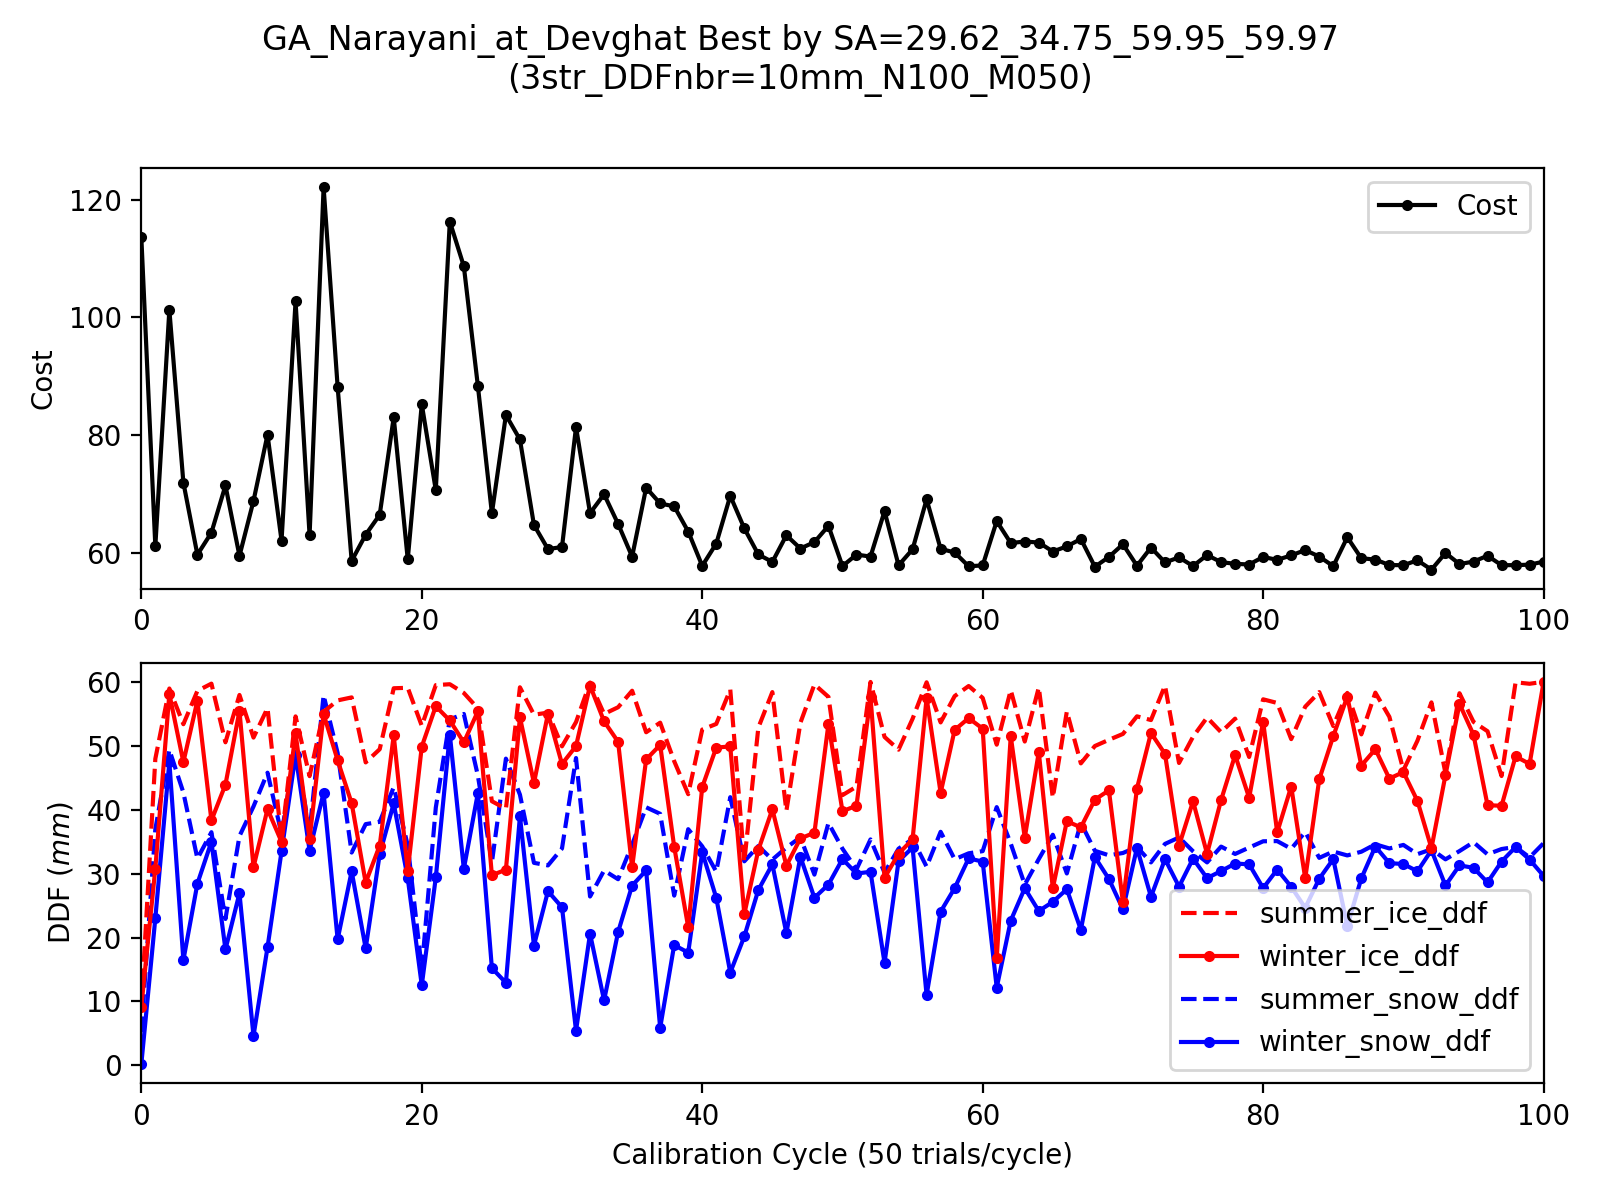

Plot saved to GA_Narayani_at_Devghat.3str_DDFnbr=10mm_N100_M050.z58.497_Best29.62_34.75_59.95_59.97.SA_summary.png


In [19]:
plot_sa_summary(datafile)

# plot the complete solution space that was investigated

In [15]:
#caldf = fbm.get_calibration_stats(logFile, verbose=1)
#caldf["stats"]
%pwd

u'/projects/brodzik/ipython_notebooks/charis'

In [20]:
#def plot_solution_space(caldf, drainageid, nstrikes, label):
def plot_solution_space(file):
    
    # Parse the filename for drainageid and label
    parts = file.split('.')
    drainageid = parts[0]
    label = parts[1]
    
    # Parse the label for nstrikes
    parts = label.split('str')
    nstrikes=int(parts[0])
    
    # Read the data 
    caldf = fbm.get_calibration_stats(file)
    
    # Reverse the order of rows, so smallest-ordered values are plotted last
    # Best model is now last in data frame
    df = caldf["stats"][::-1]
    best_i = -1

    fig, ax = plt.subplots(2, 3, figsize=(9,6))

    fig.suptitle(
        "%s Best=%s \n(%d strikes, RMSE=%.3f $km^3$, Voldiff=%.3f%%, numModels=%d)" % (
            drainageid, df.index[-1], 
            nstrikes,
            df["monthly_rmse_km3"].iloc[-1], 
            df["annual_voldiff_pcent"].iloc[-1],
            len(df.index)),
        fontsize=12)

    surfaces = ["ice", "snow"]
    markers =  ["^", "o"]

    for i, surface in enumerate(surfaces):
    
        row = i
        min_ddf = "min_%s_ddf" % surface
        max_ddf = "max_%s_ddf" % surface
        min_ddf_label = "winter_%s_ddf" % surface
        max_ddf_label = "summer_%s_ddf" % surface
        
        # Upper Left: RMSE as function of min/max snow ddf 
        col = 0
        rmse_plot = ax[row, col].scatter(df[min_ddf],
                                 df[max_ddf],
                                 c=df["monthly_rmse_km3"],
                                 cmap="Greens",
                                 edgecolor="",
                                 marker=markers[i])
        ax[row, col].plot([df[min_ddf].iloc[best_i]],
                          [df[max_ddf].iloc[best_i]],
                          marker="x",
                          color="red")
        ax[row, col].set_title('Monthly RMSE ($km^3$)')
        ax[row, col].set_xlabel(min_ddf_label)
        ax[row, col].set_ylabel(max_ddf_label)
        ax[row, col].axis([0., 60., 0., 60.])
        ax[row, col].set_aspect('equal', 'box')
        fig.colorbar(rmse_plot, ax=ax[row,col])

        # Middle: Annual volume difference
        col = 1
        vmax = np.max(df["abs_voldiff_pcent"])
        vmax = 10.0
        vmin = -1.0 * vmax
        voldiff_plot = ax[row, col].scatter(df[min_ddf],
                                            df[max_ddf],
                                            c=df["annual_voldiff_pcent"],
                                            cmap="BrBG_r",
                                            vmin=vmin,
                                            vmax=vmax,
                                            edgecolor="",
                                            marker=markers[i])
        ax[row, col].plot([df[min_ddf].iloc[best_i]],
                          [df[max_ddf].iloc[best_i]],
                          marker="x",
                          color="red")
        
        ax[row, col].set_title('Annual vol diff (%)')
        ax[row, col].set_xlabel(min_ddf_label)
        ax[row, col].set_ylabel(max_ddf_label)
        ax[row, col].axis([0., 60., 0., 60.])
        ax[row, col].set_aspect('equal', 'box')
        fig.colorbar(voldiff_plot, ax=ax[row,col])
        
        # Right: Combined Z score
        col = 2
        vmax = np.max(df["z"])
        vmax = 200.0;
        vmin = 0.0
        z_plot = ax[row, col].scatter(df[min_ddf],
                                      df[max_ddf],
                                      c=df["z"],
                                      cmap="Greys",
                                      vmin=vmin,
                                      vmax=vmax,
                                      edgecolor="",
                                      marker=markers[i])
        ax[row, col].plot([df[min_ddf].iloc[best_i]],
                          [df[max_ddf].iloc[best_i]],
                          marker="x",
                          color="red")
        ax[row, col].set_title('Z')
        ax[row, col].set_xlabel(min_ddf_label)
        ax[row, col].set_ylabel(max_ddf_label)
        ax[row, col].axis([0., 60., 0., 60.])
        ax[row, col].set_aspect('equal', 'box')
        fig.colorbar(z_plot, ax=ax[row,col])


    fig.tight_layout()
    fig.subplots_adjust(top=0.86)

    outfile = "%s.%s.z%.3f_Best%s.stats.png" % (
        drainageid, label.replace(" ", "_"), df["z"].iloc[best_i], df.index[-1])
    plt.savefig(outfile)
    print("Image saved to %s" % outfile)
    outlink = "%s.%s.stats.png" % (drainageid, label.replace(" ", "_"))
    if os.path.exists( outlink):
        os.remove( outlink )
    os.symlink( outfile, outlink )

<IPython.core.display.Javascript object>


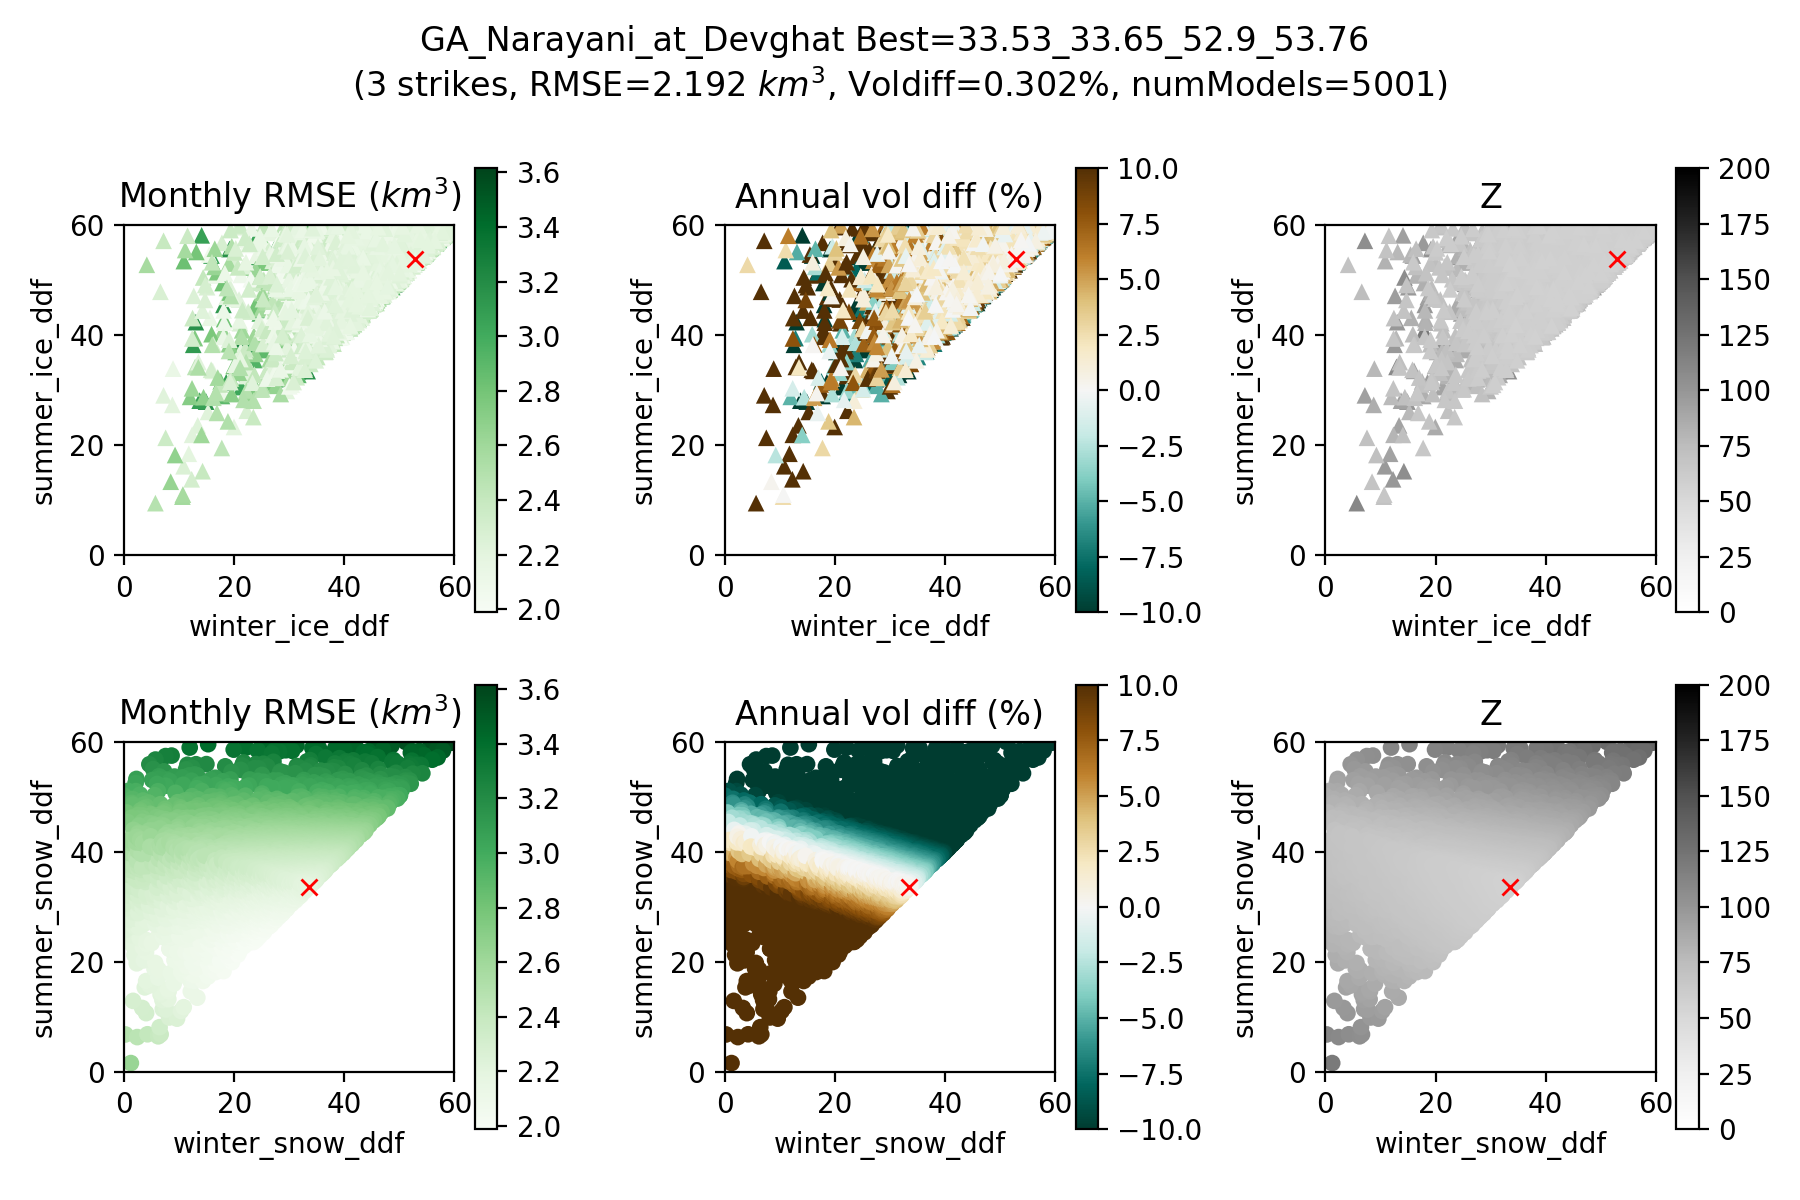

Image saved to GA_Narayani_at_Devghat.3str_DDFnbr=10mm_N100_M050.z57.133_Best33.53_33.65_52.9_53.76.stats.png


In [21]:
plot_solution_space(logFile)

In [22]:
%pwd

u'/work/charis/ti_model/calibrations_correct_cost'

# Redo the whole batch of SA_summary plots

In [ ]:
list = glob.glob("GA_Sap*2str*SA_summary.dat")
print(list)
for file in list:
    plot_sa_summary(file)

# Redo the whole batch of solution space plots

In [ ]:
%cd /work/charis/ti_model/calibrations_correct_cost
%ls

In [ ]:
list = glob.glob("GA_Sap*2str*stats.txt")
list

In [ ]:
for file in list:
    plot_solution_space(file)